<div class="markdown-google-sans">
  <h1>Section 1: Exploratory Data Analysis</h1>
</div>

Thực hành xử lý dữ liệu

<br/>
Data được lấy từ Kaggle: https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/data <br/>


Đây là dữ liệu về những trò chơi điện tử mà bán được hon 100,000 bản. Dữ liệu này được thu thập bởi vgchartz.com.


 <br />


## 1. Import các thư viện cần thiết
Nên để ở đầu trang để dễ dàng thêm bớt, mỗi nơi thêm một thư viện là tìm lại đau mắt luôn đó

In [ ]:
# Import thư viện pandas để xử lý và phân tích dữ liệu
import pandas as pd

# Import thư viện plotly.express để tạo biểu đồ tương tác
import plotly.express as px

## 2. Đọc dữ liệu vào DataFrame

In [ ]:
# Nhập module drive từ thư viện google.colab để có thể truy cập Google Drive từ Colab
from google.colab import drive
# Kết nối và gắn (mount) Google Drive vào thư mục /content/drive để có thể đọc và ghi dữ liệu
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# File này chứa thông tin về các trò chơi bán được hơn 100,000 bản từ vgchartz.com
# Dữ liệu được lưu vào biến df (DataFrame) để phân tích
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv')
# Dữ liệu được lưu vào biến df (DataFrame) để phân tích
# File này chứa thông tin về các trò chơi bán được hơn 100,000 bản từ vgchartz.com. Đọc CSV file chứa CSV dữ liệu chứa về doanh dữ số bán liệu game từ về đường doanh dẫn trong số Google Drive bán game từ đường dẫn trong Google Drive

## 3. Data Overview

**Data fields: (Given to you)**

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

**Seeing the data can make you understand the fields more**

In [ ]:
# Tính tổng dung lượng bộ nhớ được sử dụng bởi DataFrame
# memory_usage(index=True) trả về kích thước bộ nhớ (tính bằng byte) của từng cột và cả chỉ mục
# sum() tính tổng toàn bộ dung lượng bộ nhớ của tất cả các cột và chỉ mục
# Điều này giúp chúng ta biết được DataFrame đang chiếm bao nhiêu bộ nhớ,
# hữu ích khi làm việc với tập dữ liệu lớn để tối ưu hóa việc sử dụng bộ nhớ
df.memory_usage(index=True).sum()

1460752

In [ ]:
# Kiểm tra xem dữ liệu đã được tải thành công chưa
# Xem một vài dòng đầu tiên của dữ liệu
# Bắt đầu hiểu ý nghĩa dữ liệu - mỗi cột (đặc trưng) trông như thế nào

df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Một vài dòng cuối cùng của dữ liệu
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
# Tổng số dòng và cột trong DataFrame

df.shape

(16598, 11)

In [ ]:

  #  Int16 -- (-32,768 to +32,767)

  #  Int32 -- (-2,147,483,648 to +2,147,483,647)

  #  Int64 -- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)

df.info() # Thông tin về DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 4. Basic Statiscal Measures (Các phương pháp thống kê cơ bản)

In [ ]:
# Thống kê cơ bản

# mean (trung bình) - 50%: median (trung vị)
# chỉ áp dụng với dữ liệu số
# Các phân vị: Q1: 25%, Q2: trung vị, Q3: 75%
# Khoảng giữa các phân vị (IQR): Q3 - Q1

# Hiển thị tổng quan thống kê mô tả của dữ liệu số trong DataFrame
# Bao gồm số lượng giá trị, giá trị trung bình, độ lệch chuẩn,
# giá trị nhỏ nhất, các phân vị 25%, 50% (trung vị), 75% và giá trị lớn nhất
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### 4.1 Central Tendency: Mean, mode, median | Data Distribution (Xu hướng trung tâm: Giá trị trung bình, mode, trung vị | Phân phối dữ liệu)

Để thực hành các phép đo thống kê cơ bản, chúng ta sẽ sử dụng dữ liệu doanh số bán trò chơi điện tử.

In [ ]:
# Tính giá trị trung bình của doanh số bán tại Bắc Mỹ
na_sales_mean = df["NA_Sales"].mean()
# Tính giá trị trung bình của doanh số bán tại châu Âu
eu_sales_mean = df["EU_Sales"].mean()
# Tính giá trị trung bình của doanh số bán tại Nhật Bản
jp_sales_mean = df["JP_Sales"].mean()
# Tính giá trị trung bình của doanh số bán tại các khu vực khác
other_sales_mean = df["Other_Sales"].mean()
# Tính giá trị trung bình của doanh số bán toàn cầu
global_sales_mean = df["Global_Sales"].mean()

# In ra giá trị trung bình của doanh số bán tại Bắc Mỹ
print("Giá trị trung bình của doanh số bán tại Bắc Mỹ là " + str(na_sales_mean))
# In ra giá trị trung bình của doanh số bán tại châu Âu
print("Giá trị trung bình của doanh số bán tại Châu Âu là" + str(eu_sales_mean))
# In ra giá trị trung bình của doanh số bán tại Nhật Bản
print("Giá trị trung bình của doanh số bán tại Nhật Bản là" + str(jp_sales_mean))
# In ra giá trị trung bình của doanh số bán tại các khu vực khác
print("Giá trị trung bình của doanh số bán tại các khu vực khác là" + str(other_sales_mean))
# In ra giá trị trung bình của doanh số bán toàn cầu
print("Giá trị trung bình của doanh số bán toàn cầu là" + str(global_sales_mean))

# In kết luận về phân tích doanh số bán trung bình
print("Dựa trên giá trị trung bình, không tính doanh số toàn cầu, chúng ta nhận thấy rằng doanh số trung bình tại khu vực Bắc Mỹ là cao nhất; gần gấp đôi giá trị trung bình của khu vực đứng thứ hai – châu Âu.")

NameError: name 'df' is not defined

In [ ]:
# Tính giá trị trung vị (median) của doanh số bán tại Bắc Mỹ
na_sales_median = df["NA_Sales"].median()
# Tính giá trị trung vị (median) của doanh số bán tại châu Âu
eu_sales_median = df["EU_Sales"].median()
# Tính giá trị trung vị (median) của doanh số bán tại Nhật Bản
jp_sales_median = df["JP_Sales"].median()
# Tính giá trị trung vị (median) của doanh số bán tại các khu vực khác
other_sales_median = df["Other_Sales"].median()
# Tính giá trị trung vị (median) của doanh số bán toàn cầu
global_sales_median = df["Global_Sales"].median()

# In ra giá trị trung vị của doanh số bán tại Bắc Mỹ
print("Giá trị trung vị của doanh số bán tại Bắc Mỹ là " + str(na_sales_median))
# In ra giá trị trung vị của doanh số bán tại châu Âu
print("Giá trị trung vị của doanh số bán tại Châu Âu là " + str(eu_sales_median))
# In ra giá trị trung vị của doanh số bán tại Nhật Bản
print("Giá trị trung vị của doanh số bán tại Nhật Bản là " + str(jp_sales_median))
# In ra giá trị trung vị của doanh số bán tại các khu vực khác
print("Giá trị trung vị của doanh số bán tại các khu vực khác là " + str(other_sales_median))
# In ra giá trị trung vị của doanh số bán toàn cầu
print("Giá trị trung vị của doanh số bán toàn cầu là " + str(global_sales_median))

# In kết luận về phân tích doanh số bán trung vị
print("Nếu chúng ta sử dụng giá trị trung vị, thì doanh số trung vị tại khu vực Bắc Mỹ vẫn là cao nhất, tuy nhiên, nó chỉ gần bằng một phần tư giá trị trung vị của doanh số tại châu Âu.")

Median Value of NA Sales is 0.08
Median Value of EU Sales is 0.02
Median Value of JP Sales is 0.0
Median Value of Other Sales is 0.01
Median Value of Global Sales is 0.17
If we use the median, median sales value in NA is still highest, however, it is nearly fourth the median sales value in EU 


In [ ]:
# Tính giá trị xuất hiện nhiều nhất (mode) của doanh số bán tại Bắc Mỹ
na_sales_mode = df["NA_Sales"].mode()
# Tính giá trị xuất hiện nhiều nhất (mode) của doanh số bán tại châu Âu
eu_sales_mode = df["EU_Sales"].mode()
# Tính giá trị xuất hiện nhiều nhất (mode) của doanh số bán tại Nhật Bản
jp_sales_mode = df["JP_Sales"].mode()
# Tính giá trị xuất hiện nhiều nhất (mode) của doanh số bán tại các khu vực khác
other_sales_mode = df["Other_Sales"].mode()
# Tính giá trị xuất hiện nhiều nhất (mode) của doanh số bán toàn cầu
global_sales_mode = df["Global_Sales"].mode()

# In ra giá trị xuất hiện nhiều nhất của doanh số bán tại Bắc Mỹ
print("Giá trị mode của doanh số bán tại Bắc Mỹ là " + str(na_sales_mode))
# In ra giá trị xuất hiện nhiều nhất của doanh số bán tại châu Âu
print("Giá trị mode của doanh số bán tại Châu Âu là " + str(eu_sales_mode))
# In ra giá trị xuất hiện nhiều nhất của doanh số bán tại Nhật Bản
print("Giá trị mode của doanh số bán tại Nhật Bản là " + str(jp_sales_mode))
# In ra giá trị xuất hiện nhiều nhất của doanh số bán tại các khu vực khác
print("Giá trị mode của doanh số bán tại các khu vực khác là " + str(other_sales_mode))
# In ra giá trị xuất hiện nhiều nhất của doanh số bán toàn cầu
print("Giá trị mode của doanh số bán toàn cầu là" + str(global_sales_mode))

# In kết luận về việc sử dụng mode làm phép đo xu hướng trung tâm
print("Nếu chúng ta sử dụng giá trị mode để xác định xu hướng trung tâm, ta có thể thấy rằng giá trị mode cho kết quả rất khác so với giá trị trung vị và giá trị trung bình.")

Mode Value of NA Sales is 0    0.0
dtype: float64
Mode Value of EU Sales is 0    0.0
dtype: float64
Mode Value of JP Sales is 0    0.0
dtype: float64
Mode Value of Other Sales is 0    0.0
dtype: float64
Mode Value of Global Sales is 0    0.02
dtype: float64
If we use, the mode value to find the central tency, we can see that the mode values return a very different value compared to median and mode.


Through this example, I hope you all see that using different ways we can have very different central values. 

The question now is: **What is the data distribution type of the sales values?**

Hint: Mode < Median < Mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21f04e9690>,
      dtype=object)

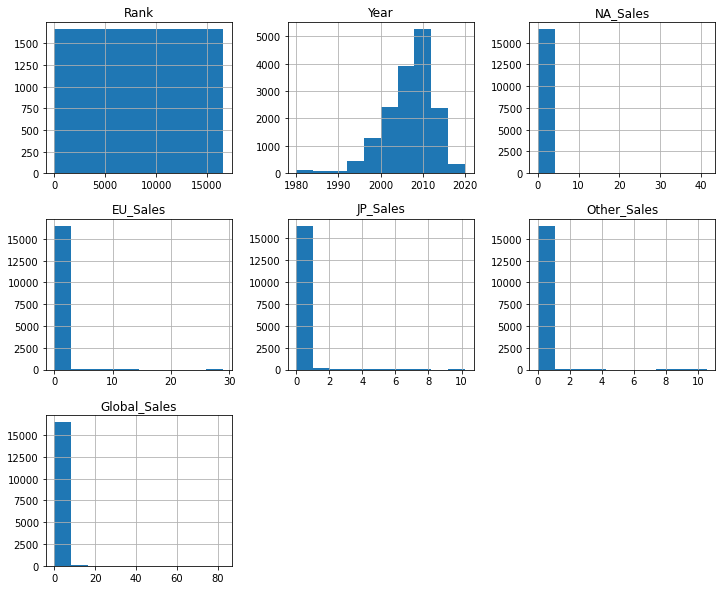

In [ ]:
# skewness - Độ lệch của phân phối dữ liệu
# Vẽ biểu đồ histogram cho tất cả các thuộc tính số trong DataFrame
# Biểu đồ này giúp chúng ta nhìn thấy phân phối của dữ liệu và xác định độ lệch

df.hist(figsize=(12,10))

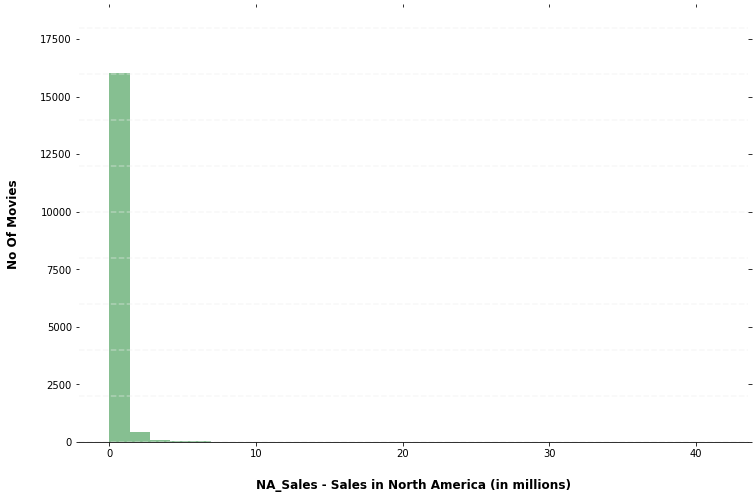

In [ ]:
# Tạo biểu đồ histogram cho cột NA_Sales với 30 khoảng (bins)
# grid=False: không hiển thị lưới, figsize=(12,8): kích thước hình là 12x8 inch
# color='#86bf91': màu xanh lá cây cho các cột trong biểu đồ
ax = df.hist(column='NA_Sales', bins=30, grid=False, figsize=(12,8), color='#86bf91')

# Lấy đối tượng axes đầu tiên từ mảng trả về từ hist()
ax = ax[0]

# Vòng lặp qua mỗi đối tượng trục (axes) trong biểu đồ để tùy chỉnh
for x in ax:

    # Ẩn viền bên phải của biểu đồ để làm gọn gàng hơn
    x.spines['right'].set_visible(False)
    # Ẩn viền trên cùng của biểu đồ
    x.spines['top'].set_visible(False)
    # Ẩn viền bên trái của biểu đồ
    x.spines['left'].set_visible(False)

    # Tắt tất cả các dấu tích (ticks) trên trục x và y
    # bottom="off": tắt dấu tích dưới, top="off": tắt dấu tích trên
    # labelbottom="on": giữ nhãn dưới, left="off": tắt dấu tích trái
    # right="off": tắt dấu tích phải, labelleft="on": giữ nhãn trái
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Vẽ các đường ngang tương ứng với các giá trị trên trục y
    # Lấy các giá trị tích trên trục y
    vals = x.get_yticks()
    # Với mỗi giá trị, vẽ một đường ngang đứt nét mờ để dễ đọc giá trị
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Xóa tiêu đề mặc định của biểu đồ
    x.set_title("")

    # Đặt nhãn cho trục x với chú thích về ý nghĩa của NA_Sales
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: cỡ chữ là 12
    x.set_xlabel("NA_Sales - Sales in North America (in millions)", labelpad=20, weight='bold', size=12)

    # Đặt nhãn cho trục y mô tả số lượng trò chơi
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: cỡ chữ là 12
    x.set_ylabel("Số lượng trò chơi", labelpad=20, weight='bold', size=12)


Vì vậy, từ dữ liệu này, chúng ta không rút ra được nhiều thông tin hữu ích. Vấn đề là có quá nhiều giá trị bằng 0 trong doanh số bán tại Bắc Mỹ, khiến phân phối dữ liệu tập trung quá nhiều vào các giá trị 0. Do đó, chúng ta không thể quan sát được sự phân bố ở các giá trị khác.

In [ ]:
# Hiển thị kích thước (shape) của DataFrame df
# Kết quả sẽ trả về một tuple (hàng, cột) cho biết số lượng hàng và cột trong DataFrame
# Đây là một cách nhanh chóng để hiểu quy mô của bộ dữ liệu chúng ta đang làm việc với
# Thông tin này giúp chúng ta xác định tổng số lượng mẫu (số hàng) và số lượng đặc trưng (số cột)
df.shape

(16598, 11)

In [ ]:
# Đếm số lượng bản ghi trong DataFrame mà có doanh số bán tại Bắc Mỹ (NA_Sales) nhỏ hơn 1 triệu bản
# df.loc[] lọc dữ liệu theo điều kiện 'NA_Sales' < 1
# len() đếm số lượng bản ghi thỏa mãn điều kiện
# Kết quả trả về sẽ cho biết có bao nhiêu trò chơi có doanh số bán tại Bắc Mỹ thấp hơn 1 triệu bản
len(df.loc[df['NA_Sales'] < 1])

15688

In [ ]:
# Đếm số lượng trò chơi được phát hành trong năm 2009
# Sử dụng phương thức loc để lọc DataFrame chỉ lấy các hàng có giá trị 'Year' bằng 2009
# len() trả về tổng số lượng các hàng thỏa mãn điều kiện
# Kết quả cho biết có bao nhiêu trò chơi đã được phát hành vào năm 2009 trong bộ dữ liệu
len(df.loc[df['Year'] == 2009])

1431

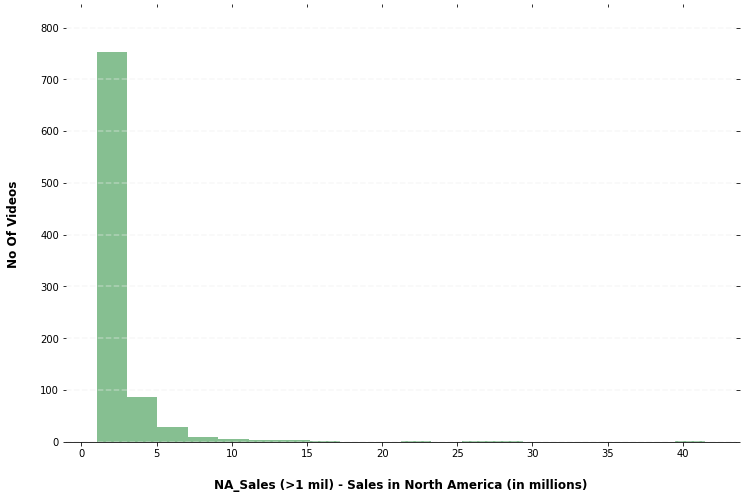

In [ ]:
# Lọc dữ liệu và chỉ giữ lại các bản ghi có doanh số bán ở Bắc Mỹ (NA_Sales) lớn hơn 1 triệu
na_sales = df.loc[df['NA_Sales'] > 1]

# Tạo biểu đồ histogram từ dữ liệu đã lọc với 20 khoảng (bins)
# grid=False: không hiển thị lưới, figsize=(12,8): kích thước biểu đồ là 12x8 inch
# color='#86bf91': sử dụng màu xanh lá cây cho các cột trong biểu đồ
ax = na_sales.hist(column='NA_Sales', bins=20, grid=False, figsize=(12,8), color='#86bf91')

# Lấy đối tượng axes đầu tiên từ mảng axes trả về từ hàm hist()
ax = ax[0]

# Vòng lặp qua từng đối tượng trục (axes) trong biểu đồ để tùy chỉnh giao diện
for x in ax:

    # Loại bỏ viền bên phải của biểu đồ để làm cho biểu đồ trông gọn gàng hơn
    x.spines['right'].set_visible(False)
    # Loại bỏ viền phía trên của biểu đồ
    x.spines['top'].set_visible(False)
    # Loại bỏ viền bên trái của biểu đồ
    x.spines['left'].set_visible(False)

    # Tắt tất cả các dấu tích (ticks) trên trục
    # bottom="off": tắt dấu tích dưới, top="off": tắt dấu tích trên
    # labelbottom="on": giữ nhãn dưới, left="off": tắt dấu tích trái
    # right="off": tắt dấu tích phải, labelleft="on": giữ nhãn trái
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Vẽ các đường ngang tương ứng với các giá trị trục y
    # Lấy các giá trị tích trên trục y
    vals = x.get_yticks()
    # Với mỗi giá trị, vẽ một đường ngang đứt nét mờ để dễ đọc giá trị
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Xóa tiêu đề mặc định của biểu đồ
    x.set_title("")

    # Đặt nhãn cho trục x, mô tả doanh số bán ở Bắc Mỹ (chỉ hiển thị các giá trị >1 triệu)
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_xlabel("NA_Sales (>1 triệu) – Doanh số tại Bắc Mỹ (tính bằng triệu đơn vị)", labelpad=20, weight='bold', size=12)

    # Đặt nhãn cho trục y, mô tả số lượng trò chơi video
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_ylabel("Số lượng trò chơi điện tử", labelpad=20, weight='bold', size=12)

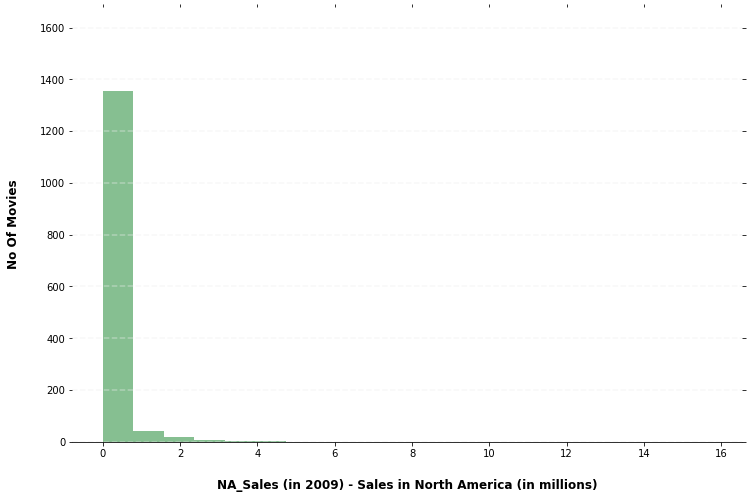

In [ ]:
# Lọc dữ liệu chỉ lấy các trò chơi được phát hành trong năm 2009
na_sales_2009 = df.loc[df['Year'] == 2009]

# Tạo biểu đồ histogram cho cột NA_Sales của các trò chơi năm 2009 với 20 khoảng (bins)
# grid=False: không hiển thị lưới, figsize=(12,8): kích thước biểu đồ là 12x8 inch
# color='#86bf91': sử dụng màu xanh lá cây cho các cột trong biểu đồ
ax = na_sales_2009.hist(column='NA_Sales', bins=20, grid=False, figsize=(12,8), color='#86bf91')

# Lấy đối tượng axes đầu tiên từ mảng axes trả về từ hàm hist()
ax = ax[0]

# Vòng lặp qua từng đối tượng trục (axes) trong biểu đồ để tùy chỉnh giao diện
for x in ax:

    # Ẩn viền bên phải của biểu đồ để làm cho biểu đồ trông gọn gàng hơn
    x.spines['right'].set_visible(False)
    # Ẩn viền phía trên của biểu đồ
    x.spines['top'].set_visible(False)
    # Ẩn viền bên trái của biểu đồ
    x.spines['left'].set_visible(False)

    # Tắt tất cả các dấu tích (ticks) trên trục
    # bottom="off": tắt dấu tích dưới, top="off": tắt dấu tích trên
    # labelbottom="on": giữ nhãn dưới, left="off": tắt dấu tích trái
    # right="off": tắt dấu tích phải, labelleft="on": giữ nhãn trái
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Vẽ các đường ngang tương ứng với các giá trị trục y
    # Lấy các giá trị tích trên trục y
    vals = x.get_yticks()
    # Với mỗi giá trị, vẽ một đường ngang đứt nét mờ để dễ đọc giá trị
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Xóa tiêu đề mặc định của biểu đồ
    x.set_title("")

    # Đặt nhãn cho trục x, mô tả doanh số bán ở Bắc Mỹ (chỉ cho năm 2009)
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_xlabel("NA_Sales (năm 2009) – Doanh số tại Bắc Mỹ (tính bằng triệu đơn vị)", labelpad=20, weight='bold', size=12)

    # Đặt nhãn cho trục y, mô tả số lượng trò chơi
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_ylabel("Số lượng trò chơi điện tử", labelpad=20, weight='bold', size=12)

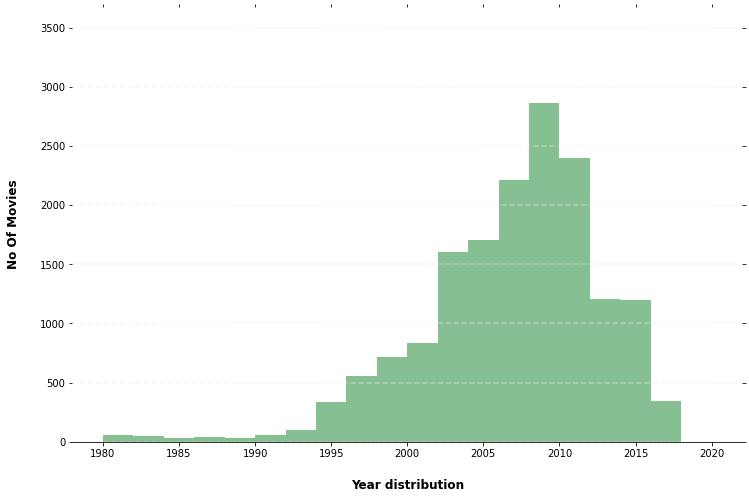

In [ ]:
# Tạo biểu đồ histogram cho cột 'Year' với 20 khoảng (bins)
# grid=False: không hiển thị lưới, figsize=(12,8): kích thước biểu đồ là 12x8 inch
# color='#86bf91': sử dụng màu xanh lá cây cho các cột trong biểu đồ
ax = df.hist(column='Year', bins=20, grid=False, figsize=(12,8), color='#86bf91')

# Lấy đối tượng axes đầu tiên từ mảng axes trả về từ hàm hist()
ax = ax[0]

# Vòng lặp qua từng đối tượng trục (axes) trong biểu đồ để tùy chỉnh giao diện
for x in ax:

    # Ẩn viền bên phải của biểu đồ để làm cho biểu đồ trông gọn gàng hơn
    x.spines['right'].set_visible(False)
    # Ẩn viền phía trên của biểu đồ
    x.spines['top'].set_visible(False)
    # Ẩn viền bên trái của biểu đồ
    x.spines['left'].set_visible(False)

    # Tắt tất cả các dấu tích (ticks) trên trục
    # bottom="off": tắt dấu tích dưới, top="off": tắt dấu tích trên
    # labelbottom="on": giữ nhãn dưới, left="off": tắt dấu tích trái
    # right="off": tắt dấu tích phải, labelleft="on": giữ nhãn trái
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Vẽ các đường ngang tương ứng với các giá trị trục y
    # Lấy các giá trị tích trên trục y
    vals = x.get_yticks()
    # Với mỗi giá trị, vẽ một đường ngang đứt nét mờ để dễ đọc giá trị
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Xóa tiêu đề mặc định của biểu đồ
    x.set_title("")

    # Đặt nhãn cho trục x, mô tả phân phối năm phát hành
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_xlabel("Phân phối theo năm phát hành", labelpad=20, weight='bold', size=12)

    # Đặt nhãn cho trục y, mô tả số lượng trò chơi 
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_ylabel("Số lượng trò chơi", labelpad=20, weight='bold', size=12)

## 4.2 Spread: Range, Variance, Standard deviation

In [ ]:
# Hiển thị thống kê mô tả cho tất cả các cột số trong DataFrame
# Bao gồm:
# count - số lượng giá trị không null
# mean - giá trị trung bình
# std - độ lệch chuẩn
# min - giá trị nhỏ nhất
# 25% - phân vị thứ nhất (Q1)
# 50% - phân vị thứ hai (trung vị)
# 75% - phân vị thứ ba (Q3)
# max - giá trị lớn nhất
# Những con số này giúp chúng ta hiểu được phân phối của dữ liệu số trong bộ dữ liệu
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# Tính toán phạm vi (range) của doanh số bán hàng cho các khu vực khác nhau

# Tìm giá trị lớn nhất của doanh số bán ở Bắc Mỹ
max_na_sales = df["NA_Sales"].max()
# Tìm giá trị nhỏ nhất của doanh số bán ở Bắc Mỹ
min_na_sales = df["NA_Sales"].min()
# Tính phạm vi (khoảng) của doanh số bán ở Bắc Mỹ bằng cách lấy giá trị lớn nhất trừ đi giá trị nhỏ nhất
range_na_sales = max_na_sales - min_na_sales

# Tìm giá trị lớn nhất của doanh số bán ở châu Âu
max_eu_sales = df["EU_Sales"].max()
# Tìm giá trị nhỏ nhất của doanh số bán ở châu Âu
min_eu_sales = df["EU_Sales"].min()
# Tính phạm vi của doanh số bán ở châu Âu bằng cách lấy giá trị lớn nhất trừ đi giá trị nhỏ nhất
range_eu_sales = max_eu_sales - min_eu_sales

# Tìm giá trị lớn nhất của doanh số bán ở Nhật Bản
max_jp_sales = df["JP_Sales"].max()
# Tìm giá trị nhỏ nhất của doanh số bán ở Nhật Bản
min_jp_sales = df["JP_Sales"].min()
# Tính phạm vi của doanh số bán ở Nhật Bản bằng cách lấy giá trị lớn nhất trừ đi giá trị nhỏ nhất
range_jp_sales = max_jp_sales - min_jp_sales

# Tìm giá trị lớn nhất của doanh số bán ở các khu vực khác
max_other_sales = df["Other_Sales"].max()
# Tìm giá trị nhỏ nhất của doanh số bán ở các khu vực khác
min_other_sales = df["Other_Sales"].min()
# Tính phạm vi của doanh số bán ở các khu vực khác bằng cách lấy giá trị lớn nhất trừ đi giá trị nhỏ nhất
range_other_sales = max_other_sales - min_other_sales

# Tìm giá trị lớn nhất của doanh số bán toàn cầu
max_global_sales = df["Global_Sales"].max()
# Tìm giá trị nhỏ nhất của doanh số bán toàn cầu
min_global_sales = df["Global_Sales"].min()
# Tính phạm vi của doanh số bán toàn cầu bằng cách lấy giá trị lớn nhất trừ đi giá trị nhỏ nhất
range_global_sales = max_global_sales - min_global_sales

# In ra thông tin về giá trị lớn nhất, nhỏ nhất và phạm vi của doanh số bán ở Bắc Mỹ
print("Giá trị lớn nhất của doanh số bán tại Bắc Mỹ là " + str(max_na_sales) + " và giá trị nhỏ nhất của doanh số bán tại Bắc Mỹ là " + str(min_na_sales) + ". Vì vậy, khoảng biến thiên của doanh số bán tại Bắc Mỹ là " + str(range_na_sales))
# In ra thông tin về giá trị lớn nhất, nhỏ nhất và phạm vi của doanh số bán ở châu Âu
print("Giá trị lớn nhất của doanh số bán tại Châu Âu là " + str(max_eu_sales) + " và giá trị nhỏ nhất của doanh số bán tại Châu Âu là " + str(min_eu_sales) + ". Vì vậy, khoảng biến thiên của doanh số bán tại Châu Âu là " + str(range_eu_sales))
# In ra thông tin về giá trị lớn nhất, nhỏ nhất và phạm vi của doanh số bán ở Nhật Bản
print("Giá trị lớn nhất của doanh số bán tại Nhật Bản là " + str(max_jp_sales) + " và giá trị nhỏ nhất của doanh số bán tại Nhật Bản là " + str(min_jp_sales) + ". Vì vậy, khoảng biến thiên của doanh số bán tại Nhật Bản là " + str(range_jp_sales))
# In ra thông tin về giá trị lớn nhất, nhỏ nhất và phạm vi của doanh số bán ở các khu vực khác
print("Giá trị lớn nhất của doanh số bán ở các khu vực khác là " + str(max_other_sales) + " và giá trị nhỏ nhất của doanh số bán ở các khu vực khác là " + str(min_other_sales) + ". Vì vậy, khoảng biến thiên của doanh số bán ở các khu vực khác là " + str(range_other_sales))
# In ra thông tin về giá trị lớn nhất, nhỏ nhất và phạm vi của doanh số bán toàn cầu
print("Giá trị lớn nhất của doanh số bán toàn cầu là " + str(max_global_sales) + " và giá trị nhỏ nhất của doanh số bán toàn cầu là " + str(min_global_sales) + ". Vì vậy, khoảng biến thiên của doanh số bán toàn cầu là " + str(range_global_sales))

The Max value for NA Sales is 41.49 and the Min value for NA Sales is 0.0. Thefore, the range for NA Sales is 41.49
The Max value for EU Sales is 29.02 and the Min value for EU Sales is 0.0. Thefore, the range for EU Sales is 29.02
The Max value for JP Sales is 10.22 and the Min value for JP Sales is 0.0. Thefore, the range for JP Sales is 10.22
The Max value for Other Sales is 10.57 and the Min value for Other Sales is 0.0. Thefore, the range for Other Sales is 10.57
The Max value for Global Sales is 82.74 and the Min value for Global Sales is 0.01. Thefore, the range for Global Sales is 82.72999999999999


In [ ]:
# Tạo DataFrame từ dữ liệu đã được tính toán trước đó
import pandas as pd
  
# Khởi tạo dữ liệu dưới dạng dictionary với các giá trị đã được tính ở cell trước
data = {
                'NA Sales': [max_na_sales, min_na_sales, range_na_sales],  # Dữ liệu doanh số Bắc Mỹ (giá trị lớn nhất, nhỏ nhất, khoảng)
                'EU Sales': [max_eu_sales, min_eu_sales, range_eu_sales],  # Dữ liệu doanh số châu Âu (giá trị lớn nhất, nhỏ nhất, khoảng)
                'JP Sales': [max_jp_sales, min_jp_sales, range_jp_sales],  # Dữ liệu doanh số Nhật Bản (giá trị lớn nhất, nhỏ nhất, khoảng)
                'Other Sales': [max_other_sales, min_other_sales, range_other_sales],  # Dữ liệu doanh số các khu vực khác (giá trị lớn nhất, nhỏ nhất, khoảng)
                'Global Sales': [max_global_sales, min_global_sales, range_global_sales]  # Dữ liệu doanh số toàn cầu (giá trị lớn nhất, nhỏ nhất, khoảng)
                }

# Tạo DataFrame với dữ liệu trên và đặt tên cho các hàng là 'Max', 'Min', 'Range'
statistics = pd.DataFrame(data, index=['Max', 'Min', 'Range'])

# Hiển thị DataFrame chứa thông tin thống kê về doanh số bán game ở các khu vực
statistics

,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
Max,41.49,29.02,10.22,10.57,82.74
Min,0.00,0.00,0.00,0.00,0.01
Range,41.49,29.02,10.22,10.57,82.73


In [ ]:
import math

# ddof = degree of freedom - bậc tự do
# Định nghĩa hàm tính phương sai của một tập dữ liệu
def variance(data, ddof=1):
  n = len(data)  # Tính số lượng phần tử trong tập dữ liệu
  mean = sum(data) / n  # Tính giá trị trung bình của tập dữ liệu
  return sum((x - mean) ** 2 for x in data) / (n - ddof)  # Tính phương sai theo công thức: tổng bình phương chênh lệch chia cho (n - ddof)

# Định nghĩa hàm tính độ lệch chuẩn từ phương sai
def stdev(data):
  var = variance(data)  # Tính phương sai của tập dữ liệu
  std_dev = math.sqrt(var)  # Tính độ lệch chuẩn bằng cách lấy căn bậc hai của phương sai
  return std_dev

# Tính phương sai và độ lệch chuẩn của doanh số bán tại Bắc Mỹ
variance_na_sales = variance(df["NA_Sales"])
stdev_na_sales = stdev(df["NA_Sales"])

# Tính phương sai và độ lệch chuẩn của doanh số bán tại châu Âu
variance_eu_sales = variance(df["EU_Sales"])
stdev_eu_sales = stdev(df["EU_Sales"])

# Tính phương sai và độ lệch chuẩn của doanh số bán tại Nhật Bản
variance_jp_sales = variance(df["JP_Sales"])
stdev_jp_sales = stdev(df["JP_Sales"])

# Tính phương sai và độ lệch chuẩn của doanh số bán tại các khu vực khác
variance_other_sales = variance(df["Other_Sales"])
stdev_other_sales = stdev(df["Other_Sales"])

# Tính phương sai và độ lệch chuẩn của doanh số bán toàn cầu
variance_global_sales = variance(df["Global_Sales"])
stdev_global_sales = stdev(df["Global_Sales"])

# Tạo từ điển dữ liệu chứa phương sai và độ lệch chuẩn của doanh số bán ở các khu vực
data = {
        'NA Sales': [variance_na_sales, stdev_na_sales],  # Dữ liệu doanh số Bắc Mỹ
        'EU Sales': [variance_eu_sales, stdev_eu_sales],  # Dữ liệu doanh số châu Âu
        'JP Sales': [variance_jp_sales, stdev_jp_sales],  # Dữ liệu doanh số Nhật Bản
        'Other Sales': [variance_other_sales, stdev_other_sales],  # Dữ liệu doanh số các khu vực khác
        'Global Sales': [variance_global_sales, stdev_global_sales]  # Dữ liệu doanh số toàn cầu
        }

# Tạo DataFrame từ dữ liệu với các hàng là 'Variance' và 'Standard Deviation'
statistics_1 = pd.DataFrame(data, index=['Variance', 'Standard Deviation'])

# Hiển thị bảng thống kê về phương sai và độ lệch chuẩn của doanh số bán game ở các khu vực
statistics_1

,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
Variance,0.666971,0.255380,0.095661,0.035566,2.418112
Standard Deviation,0.816683,0.505351,0.309291,0.188588,1.555028


In [ ]:
# Kiểm tra Quy tắc Thực nghiệm (Empirical Rule)

# Tính độ lệch chuẩn của doanh số bán tại Bắc Mỹ từ hàm stdev đã định nghĩa trước đó
stdev_na_sales = stdev(df["NA_Sales"])

# Tính giá trị trung bình của doanh số bán tại Bắc Mỹ
na_sales_mean = df["NA_Sales"].mean()

# Tính giới hạn trên của khoảng 3 độ lệch chuẩn (99.7% dữ liệu sẽ nằm trong khoảng này)
# Công thức: giá trị trung bình cộng với 3 lần độ lệch chuẩn
upper_range = na_sales_mean + 3*stdev_na_sales

# Tính giới hạn dưới của khoảng 3 độ lệch chuẩn
# Công thức: giá trị trung bình trừ đi 3 lần độ lệch chuẩn
lower_range = na_sales_mean - 3*stdev_na_sales

# In ra giới hạn trên - bất kỳ giá trị nào lớn hơn số này có thể được coi là ngoại lai
print(upper_range)

# In ra giới hạn dưới - bất kỳ giá trị nào nhỏ hơn số này có thể được coi là ngoại lai
print(lower_range)

2.714716517707949
-2.185381658086308


In [ ]:
# Chúng ta nhận thấy rằng 98.95% dữ liệu nằm trong phạm vi 3 độ lệch chuẩn từ giá trị trung bình.
# Dữ liệu nằm ngoài phạm vi này có thể được coi là các giá trị ngoại lai (outlier).

# Đếm tổng số dòng trong DataFrame để sử dụng làm mẫu số khi tính phần trăm
total_rows = len(df)

# Đếm số lượng bản ghi có doanh số bán tại Bắc Mỹ nhỏ hơn 2.714716517707949 triệu bản
# (giá trị này có thể là ngưỡng dưới của khoảng 3 độ lệch chuẩn từ giá trị trung bình)
na_range = len(df.loc[df['NA_Sales'] < 2.714716517707949])

# Tính phần trăm của các bản ghi có doanh số bán dưới ngưỡng
# Công thức: (số bản ghi dưới ngưỡng / tổng số bản ghi) * 100
percentage = na_range/total_rows*100

# Hiển thị phần trăm dữ liệu nằm dưới ngưỡng
# Kết quả này giúp xác minh quy tắc thực nghiệm (nếu kết quả gần 50%, điều này phù hợp với phân phối chuẩn)
print(percentage)

98.9516809254127


## 4.3 Quartiles and IQR (Các tứ phân vị và khoảng tứ phân vị (IQR))

In [ ]:
# Hiển thị thông tin thống kê mô tả về các cột số trong DataFrame
# Bao gồm: 
# - count: số lượng giá trị không null
# - mean: giá trị trung bình
# - std: độ lệch chuẩn
# - min: giá trị nhỏ nhất
# - 25%: phân vị thứ nhất (Q1)
# - 50%: phân vị thứ hai (trung vị)
# - 75%: phân vị thứ ba (Q3)
# - max: giá trị lớn nhất
# Các thông số này giúp hiểu tổng quan về phân phối dữ liệu và xác định các giá trị bất thường
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# Tính khoảng tứ phân vị (IQR) bằng cách lấy khoảng cách giữa Q3 và Q1 nhân với một hệ số
import numpy as np  # Import thư viện numpy để thực hiện các phép tính thống kê

# Tính Q1 (phân vị thứ 25) cho doanh số bán tại Bắc Mỹ
quartile_1 = np.percentile(df["NA_Sales"], 25)  # 25% doanh số thấp nhất nằm dưới giá trị này

# Tính Q3 (phân vị thứ 75) cho doanh số bán tại Bắc Mỹ
quartile_3 = np.percentile(df["NA_Sales"], 75)  # 75% doanh số thấp nhất nằm dưới giá trị này

# Tính khoảng tứ phân vị (IQR) bằng cách lấy Q3 trừ đi Q1
# IQR đại diện cho sự phân tán của 50% dữ liệu ở giữa
interquartile_range = quartile_3 - quartile_1

# In ra thông tin về Q1, Q3 và IQR để hiểu rõ hơn về phân phối dữ liệu doanh số bán tại Bắc Mỹ
print("Với doanh số bán tại Bắc Mỹ, tứ phân vị dưới là " + str(quartile_1) + " và tứ phân vị trên là " + str(quartile_3) + ". Khoảng tứ vị (IQR) là " + str(interquartile_range))

With NA Sales, the lower quartile is 0.0 and the higher quartile is 0.24. The Interquartile Range is 0.24


In [ ]:
# Tính tổng số dòng (bản ghi) trong DataFrame df
total_rows = len(df)

# Đếm số lượng bản ghi có doanh số bán ở Bắc Mỹ (NA_Sales) nhỏ hơn 0.24 triệu đơn vị
# Sử dụng phương thức loc để lọc ra các bản ghi thỏa mãn điều kiện
na_range = len(df.loc[df['NA_Sales'] < 0.24])

# Tính phần trăm của các bản ghi có doanh số bán nhỏ hơn 0.24 triệu
# Công thức: (số bản ghi thỏa mãn điều kiện / tổng số bản ghi) * 100
percentage = na_range/total_rows*100

# In ra kết quả phần trăm
# Giá trị này cho biết có bao nhiêu phần trăm trò chơi có doanh số bán ở Bắc Mỹ thấp hơn 0.24 triệu đơn vị
print(percentage)

74.64754789733703


In [ ]:
# Tính tổng số dòng (bản ghi) trong DataFrame df
# Điều này giúp chúng ta biết có bao nhiêu trò chơi trong bộ dữ liệu
total_rows = len(df)

# Đếm số lượng bản ghi có doanh số bán tại Bắc Mỹ (NA_Sales) nhỏ hơn hoặc bằng 0 triệu đơn vị
# Sử dụng hàm loc để lọc ra các trò chơi có doanh số bằng 0
# Điều này giúp chúng ta xác định có bao nhiêu trò chơi không bán được ở Bắc Mỹ
na_range = len(df.loc[df['NA_Sales'] <= 0])

# Tính phần trăm trò chơi không bán được ở Bắc Mỹ
# Công thức: (số trò chơi không bán được / tổng số trò chơi) * 100
# Kết quả sẽ cho biết tỉ lệ phần trăm các trò chơi không thành công ở thị trường Bắc Mỹ
percentage = na_range/total_rows*100

# In ra tỉ lệ phần trăm các trò chơi không bán được ở thị trường Bắc Mỹ
# Giá trị này giúp chúng ta hiểu tỉ lệ thành công/thất bại của các trò chơi tại thị trường này
print(percentage)

27.105675382576216


In [ ]:
# Tạo biểu đồ hộp và râu (box and whisker plot) cho các cột doanh số bán hàng ở các khu vực
# Biểu đồ này giúp trực quan hóa phân phối của dữ liệu, cho thấy:
# - Đường ngang trong hộp: trung vị (median) của dữ liệu
# - Hộp: khoảng tứ phân vị (IQR) - từ Q1 (25%) đến Q3 (75%)
# - Các đường râu: mở rộng đến giá trị lớn nhất và nhỏ nhất trong khoảng 1.5*IQR
# - Các điểm nằm ngoài râu: các giá trị ngoại lai (outlier)
# figsize=(15,15): kích thước biểu đồ 15x15 inch để dễ quan sát
df.boxplot(column=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], figsize=(15,15))  

NameError: ignored

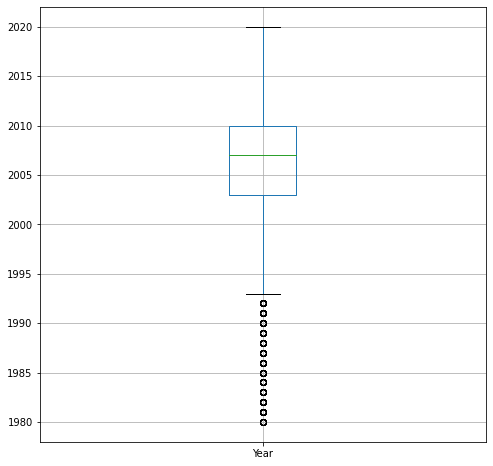

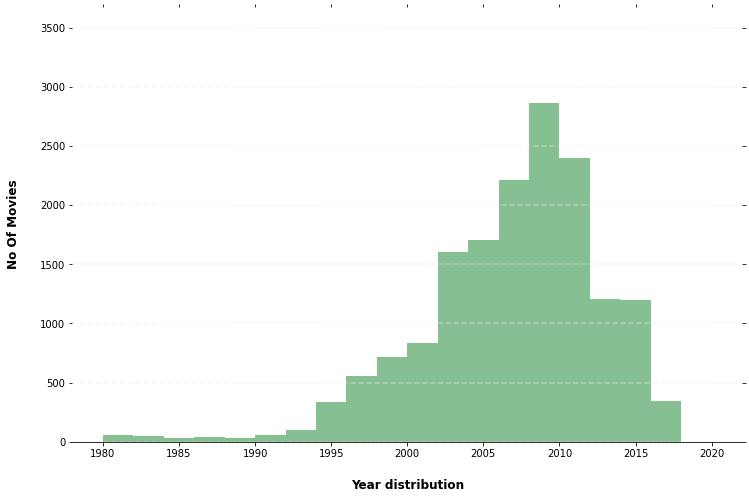

In [ ]:
# Tạo biểu đồ hộp và râu (boxplot) cho cột 'Year', kích thước 8x8 inch
df.boxplot(column=['Year'], figsize=(8,8))  

# Tạo biểu đồ histogram cho cột 'Year' với 20 khoảng (bins)
# grid=False: không hiển thị lưới
# figsize=(12,8): kích thước biểu đồ 12x8 inch
# color='#86bf91': màu xanh lá cây cho các cột trong biểu đồ
ax = df.hist(column='Year', bins=20, grid=False, figsize=(12,8), color='#86bf91')

# Lấy đối tượng axes đầu tiên từ mảng trả về bởi hàm hist()
ax = ax[0]

# Vòng lặp qua từng đối tượng trục (axes) trong biểu đồ để tùy chỉnh
for x in ax:

    # Loại bỏ viền (despine) - ẩn viền bên phải của biểu đồ
    x.spines['right'].set_visible(False)
    # Ẩn viền phía trên của biểu đồ
    x.spines['top'].set_visible(False)
    # Ẩn viền bên trái của biểu đồ
    x.spines['left'].set_visible(False)

    # Tắt tất cả các dấu tích (ticks) trên các trục
    # bottom="off": tắt dấu tích dưới, top="off": tắt dấu tích trên
    # labelbottom="on": giữ nhãn dưới, left="off": tắt dấu tích trái
    # right="off": tắt dấu tích phải, labelleft="on": giữ nhãn trái
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Vẽ các đường ngang tương ứng với các giá trị trục y
    # Lấy các giá trị tích trên trục y
    vals = x.get_yticks()
    # Với mỗi giá trị, vẽ một đường ngang đứt nét mờ để dễ đọc giá trị
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Xóa tiêu đề mặc định của biểu đồ
    x.set_title("")

    # Đặt nhãn cho trục x, mô tả phân phối năm phát hành
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_xlabel("Year distribution", labelpad=20, weight='bold', size=12)

    # Đặt nhãn cho trục y, mô tả số lượng phim
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_ylabel("No Of Movies", labelpad=20, weight='bold', size=12)

### 4.4 Percentile (Phần trăm)

In [ ]:
# Import thư viện numpy (đã được import trước đó) để sử dụng các hàm tính toán thống kê

# Tính giá trị phân vị thứ 25 (Q1) của doanh số bán tại Bắc Mỹ
# Phân vị 25% nghĩa là 25% dữ liệu có giá trị thấp hơn giá trị này
quartile_1 = np.percentile(df["NA_Sales"], 25) 

# Tính giá trị phân vị thứ 75 (Q3) của doanh số bán tại Bắc Mỹ
# Phân vị 75% nghĩa là 75% dữ liệu có giá trị thấp hơn giá trị này
quartile_3 = np.percentile(df["NA_Sales"], 75)

# Tính giá trị phân vị thứ 20 của doanh số bán tại Bắc Mỹ
# Phân vị 20% nghĩa là 20% dữ liệu có giá trị thấp hơn giá trị này
# Đây là một ngưỡng thống kê hữu ích để phân tích phân phối của dữ liệu
twenty_percentile = np.percentile(df["NA_Sales"], 20)

## 6. Deal with Missing Values (Xử lý các giá trị bị thiếu)

In [ ]:
# Hiển thị thông tin chi tiết về DataFrame
# Phương thức info() cung cấp thông tin tổng quan về DataFrame, bao gồm:
#  - Tổng số dòng và cột
#  - Tên của mỗi cột
#  - Số lượng giá trị không null trong mỗi cột
#  - Kiểu dữ liệu của mỗi cột
#  - Dung lượng bộ nhớ sử dụng
# Đây là bước quan trọng trong quá trình phân tích dữ liệu để xác định
# cần làm sạch dữ liệu như thế nào (ví dụ: xử lý giá trị null, chuyển đổi kiểu dữ liệu)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Kiểm tra xem DataFrame có chứa bất kỳ giá trị null (NaN) nào không
# df.isnull() trả về một DataFrame kích thước tương tự df, với True tại vị trí có giá trị null
# .values chuyển đổi DataFrame thành mảng NumPy
# .any() trả về True nếu có ít nhất một giá trị True trong mảng (tức là có ít nhất một giá trị null trong df)
# Đây là bước quan trọng trong việc kiểm tra chất lượng dữ liệu, giúp xác định nhanh xem dữ liệu có cần xử lý giá trị thiếu không
df.isnull().values.any()

True

In [ ]:
# Đếm số lượng giá trị null (NaN) trong mỗi cột của DataFrame
# df.isnull() trả về DataFrame có cùng kích thước với df, với True tại vị trí có giá trị null
# .sum() tính tổng theo cột, cho biết có bao nhiêu giá trị null trong mỗi cột
# Kết quả hiển thị là một Series với index là tên cột và giá trị là số lượng giá trị null trong cột đó
# Giúp xác định nhanh những cột nào cần được xử lý dữ liệu thiếu
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Đếm tổng số giá trị null (NaN) trong toàn bộ DataFrame
# df.isnull() trả về một DataFrame có cùng kích thước với df, với True tại vị trí có giá trị null
# .sum() đầu tiên tính tổng theo cột, trả về một Series với số lượng giá trị null trong mỗi cột
# .sum() thứ hai tính tổng của Series đó, cho biết tổng số giá trị null trong toàn bộ DataFrame
# Kết quả là một con số duy nhất, cho biết có bao nhiêu ô dữ liệu bị thiếu trong toàn bộ bộ dữ liệu
# Thông tin này rất hữu ích để đánh giá nhanh mức độ thiếu dữ liệu trước khi quyết định phương pháp xử lý
df.isnull().sum().sum()

329

In [ ]:
# Hiển thị các hàng chứa giá trị NaN trong dữ liệu
# df.isna() trả về một DataFrame boolean với True tại vị trí có giá trị thiếu
# .any(axis=1) kiểm tra xem có ít nhất một giá trị True trên mỗi hàng không
# df[...] lọc DataFrame gốc để chỉ giữ lại các hàng thỏa mãn điều kiện
# Kết quả cuối cùng là một DataFrame chứa tất cả các hàng có ít nhất một giá trị NaN
# Đây là bước quan trọng để xem xét cụ thể những bản ghi nào cần được xử lý giá trị thiếu
df[df.isna().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Hiển thị kích thước (shape) của DataFrame df
# Phương thức này trả về một tuple chứa số hàng và số cột của DataFrame
# Kết quả sẽ có dạng (rows, columns) - giúp ta biết được có bao nhiêu bản ghi và đặc trưng trong dữ liệu
# Đây là bước quan trọng để hiểu quy mô của bộ dữ liệu trước khi phân tích sâu hơn
df.shape

(16598, 11)

In [ ]:
# Nhận thấy chúng ta có 2 cột chứa giá trị null, chúng ta cần xử lý các giá trị bị thiếu này trước khi có thể phân tích dữ liệu.
# Những cột có giá trị null là 'Year' và 'Publisher' như đã thấy từ kết quả df.isnull().sum() trước đó

# Cách 1: Loại bỏ các hàng có chứa giá trị bị thiếu
# Phương pháp này có thể phù hợp khi tỷ lệ giá trị bị thiếu rất nhỏ so với toàn bộ dữ liệu
# Sử dụng hàm dropna() để loại bỏ tất cả các hàng có ít nhất một giá trị null
df1 = df.dropna()

# Hiển thị kích thước mới của DataFrame sau khi loại bỏ các hàng có giá trị null
# Điều này giúp chúng ta biết còn lại bao nhiêu hàng/cột sau khi làm sạch dữ liệu
df1.shape

# Dòng code đã bị comment này sẽ kiểm tra xem trong DataFrame df1 còn giá trị null nào không
# df1.isnull().sum().sum()

(16291, 11)

In [ ]:
# Tìm giá trị xuất hiện nhiều nhất (mode) trong cột 'Publisher'
# Kết quả trả về là giá trị phổ biến nhất trong cột Publisher
# Chúng ta cần thông tin này để có thể điền vào các giá trị null trong cột Publisher
# bằng giá trị phổ biến nhất, đây là một phương pháp xử lý dữ liệu thiếu
df["Publisher"].mode()

0    Electronic Arts
dtype: object

In [ ]:
# Phương pháp thứ 2 là điền giá trị na bằng giá trị khác - trong trường hợp này, phương pháp này khá khó khăn vì Publisher là một biến phân loại cụ thể

# Tạo Series mới bằng cách điền các giá trị null trong cột "Publisher" với chuỗi "Random Publisher"
# fillna() là phương thức của pandas dùng để thay thế các giá trị NaN bằng giá trị được chỉ định
df2 = df["Publisher"].fillna("Random Publisher")

# In ra tổng số giá trị null còn lại trong Series df2 sau khi đã điền giá trị
# Kết quả mong đợi là 0, nghĩa là không còn giá trị null nào trong Series này
print(df2.isnull().sum())

0


In [ ]:
# Import thư viện numpy để sử dụng cho các hàm tính toán và giá trị đặc biệt như np.nan
import numpy as np

# Tạo một bản sao của DataFrame gốc để không ảnh hưởng đến dữ liệu gốc khi thực hiện các thay đổi
# Lưu ý: Cách này chỉ tạo một tham chiếu, không phải bản sao sâu, nên thay đổi trên trial sẽ ảnh hưởng đến df
trial = df

# Thay thế các giá trị NaN (null) trong cột "Publisher" bằng "Electronic Arts"
# to_replace = np.nan: chỉ định các giá trị cần thay thế là giá trị NaN
# value = "Electronic Arts": giá trị mới thay thế vào vị trí của NaN
# Electronic Arts là nhà phát hành xuất hiện nhiều nhất trong dữ liệu theo kết quả mode() ở cell trước
trial["Publisher"] = trial["Publisher"].replace(to_replace = np.nan, value = "Electronic Arts")

# Kiểm tra số lượng giá trị null còn lại trong mỗi cột của DataFrame sau khi thực hiện thay thế
# Nếu thực hiện thành công, số lượng null trong cột Publisher sẽ giảm xuống 0
# Tuy nhiên, có thể vẫn còn giá trị null trong cột Year cần được xử lý
trial.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Tìm giá trị xuất hiện nhiều nhất (mode) trong cột 'Year'
# Phương thức mode() trả về giá trị xuất hiện với tần suất cao nhất trong Series
# Dữ liệu trả về là một Series chứa tất cả các giá trị có tần suất xuất hiện bằng nhau và cao nhất
# Trong trường hợp này, kết quả cho thấy năm 2009 là năm phổ biến nhất cho các trò chơi trong bộ dữ liệu
# Chúng ta sẽ sử dụng giá trị này để điền vào các giá trị bị thiếu (NaN) trong cột 'Year'
df["Year"].mode()

0    2009.0
dtype: float64

In [ ]:
# Điền giá trị NaN trong cột "Year" bằng giá trị phổ biến nhất (mode)
# Replace: thay thế các giá trị trong DataFrame
# to_replace = np.nan: chỉ định các giá trị cần thay thế là giá trị NaN
# value = 2009: thay thế bằng giá trị 2009, đây là năm xuất hiện nhiều nhất trong dữ liệu theo kết quả mode() ở cell trước
trial["Year"] = trial["Year"].replace(to_replace = np.nan, value = 2009)

# Kiểm tra số lượng giá trị null còn lại trong mỗi cột của DataFrame sau khi thực hiện thay thế
# Nếu thực hiện thành công, số lượng null trong cả DataFrame sẽ giảm xuống 0
# isnull().sum(): đếm số lượng giá trị null trong từng cột
trial.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## 7.Deal with Duplicated Values (Xử lý các giá trị bị trùng lặp)

In [ ]:
# Tìm và hiển thị các hàng bị trùng lặp trong toàn bộ DataFrame
# df.duplicated() trả về một Series boolean, với giá trị True cho các hàng trùng lặp (không phải hàng đầu tiên)
# df[df.duplicated()] lọc DataFrame để chỉ giữ lại các hàng bị trùng lặp
# Kết quả sẽ hiển thị tất cả các bản sao (không bao gồm bản ghi gốc đầu tiên)
# Phương thức này so sánh tất cả các cột để xác định trùng lặp, không chỉ một cột cụ thể
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [ ]:
# Tìm và hiển thị tất cả các hàng có tên trò chơi (Name) bị trùng lặp
# df.duplicated('Name') trả về một Series boolean với giá trị True cho các hàng có tên trùng lặp (không phải hàng đầu tiên)
# df[df.duplicated('Name')] lọc DataFrame để chỉ giữ lại các hàng có tên bị trùng lặp
# sort_values(by=['Name']) sắp xếp kết quả theo tên trò chơi để dễ dàng quan sát các nhóm trùng lặp
# Đây là một bước quan trọng để phân biệt giữa các trò chơi có cùng tên nhưng trên các nền tảng khác nhau
df[df.duplicated('Name')].sort_values(by=['Name'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3038,3040,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
1739,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.20,1.16
4499,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
9318,9320,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0.00,0.01,0.14
14547,14550,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...
3303,3305,pro evolution soccer 2011,X360,2010.0,Sports,Konami Digital Entertainment,0.09,0.44,0.00,0.07,0.61
2595,2597,pro evolution soccer 2011,PSP,2010.0,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.79
12605,12607,pro evolution soccer 2011,PC,2010.0,Sports,Konami Digital Entertainment,0.00,0.05,0.00,0.01,0.06
7088,7090,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.10,0.03,0.02,0.23


In [ ]:
# Xử lý các bản ghi trùng lặp bằng cách loại bỏ 
# drop_duplicates() sẽ xóa tất cả các bản ghi trùng lặp, chỉ giữ lại bản ghi đầu tiên của mỗi nhóm trùng lặp
# Mặc định, phương thức này so sánh tất cả các cột để xác định trùng lặp
# Kết quả là một DataFrame mới không chứa bản ghi trùng lặp nào
# Các bản ghi này có thể là các phiên bản giống hệt nhau của cùng một trò chơi
df_no_dup = df.drop_duplicates()

In [ ]:
# Hiển thị kích thước (shape) của DataFrame df
# Phương thức này trả về một tuple (rows, columns) chứa số hàng và số cột của DataFrame
# Kết quả giúp ta biết được có bao nhiêu bản ghi (game) và đặc trưng trong bộ dữ liệu
# Thông tin này rất hữu ích để hiểu quy mô của dữ liệu trước khi tiến hành phân tích chi tiết
df.shape

(16598, 11)

In [ ]:
# Hiển thị kích thước (shape) của DataFrame df_no_dup sau khi đã loại bỏ các bản ghi trùng lặp
# Kết quả trả về một tuple (số hàng, số cột) cho biết số lượng bản ghi duy nhất còn lại
# Bằng cách so sánh với kích thước ban đầu của df, ta có thể đánh giá có bao nhiêu bản ghi trùng lặp đã được loại bỏ
# Thông tin này giúp ta hiểu được mức độ dữ liệu bị trùng lặp trong bộ dữ liệu gốc
df_no_dup.shape

(16598, 11)

In [ ]:
# Tạo một DataFrame mới chỉ chứa các cột "Name", "Year", "Genre" từ DataFrame gốc df
# Đây là bước để tìm các trò chơi trùng lặp dựa trên tên, năm phát hành và thể loại
# Việc chọn các cột cụ thể giúp chúng ta tập trung vào phân tích trùng lặp theo các tiêu chí quan trọng
trial_duplicate = df[["Name", "Year", "Genre"]]

# Hiển thị kích thước (số hàng, số cột) của DataFrame trial_duplicate
# Điều này cho chúng ta biết có bao nhiêu bản ghi và đặc trưng trong tập dữ liệu đã lọc
# Thông tin này giúp chúng ta đánh giá quy mô của dữ liệu trước khi tìm các giá trị trùng lặp
trial_duplicate.shape

(16598, 3)

In [ ]:
# Tìm và hiển thị tất cả các hàng bị trùng lặp trong DataFrame trial_duplicate
# trial_duplicate.duplicated() trả về một Series boolean với True cho các hàng trùng lặp (không phải hàng đầu tiên)
# trial_duplicate[...] lọc DataFrame để chỉ giữ lại các hàng bị trùng lặp
# sort_values(by=['Name']) sắp xếp kết quả theo tên trò chơi để dễ dàng quan sát các nhóm trùng lặp
# Hàng trùng lặp là những hàng có cùng giá trị "Name", "Year", và "Genre"
# Điều này giúp ta xác định các trò chơi trùng lặp hoặc xuất hiện nhiều lần trong dữ liệu
trial_duplicate[trial_duplicate.duplicated()].sort_values(by=['Name'])

,Name,Year,Genre
14547,007: Quantum of Solace,2008.0,Action
1739,007: Quantum of Solace,2008.0,Action
4499,007: Quantum of Solace,2008.0,Action
9318,007: Quantum of Solace,2008.0,Action
3038,007: Quantum of Solace,2008.0,Action
...,...,...,...
4685,pro evolution soccer 2011,2010.0,Sports
2595,pro evolution soccer 2011,2010.0,Sports
3303,pro evolution soccer 2011,2010.0,Sports
7088,pro evolution soccer 2011,2010.0,Sports


In [ ]:
# Loại bỏ các hàng bị trùng lặp trong DataFrame trial_duplicate
# trial_duplicate.drop_duplicates() giữ lại bản ghi đầu tiên của mỗi nhóm trùng lặp và loại bỏ các bản ghi trùng sau đó
# Bản ghi được coi là trùng lặp nếu có cùng giá trị "Name", "Year", và "Genre"
# Kết quả là một DataFrame mới không có bản ghi trùng lặp nào
trial_duplicate_no_dup = trial_duplicate.drop_duplicates()

# Hiển thị kích thước (shape) của DataFrame sau khi đã loại bỏ các bản ghi trùng lặp
# Phương thức shape trả về một tuple (số hàng, số cột) cho biết số lượng bản ghi và đặc trưng còn lại
# Bằng cách so sánh với kích thước ban đầu của trial_duplicate, ta có thể biết có bao nhiêu bản ghi trùng đã bị loại bỏ
# Thông tin này giúp đánh giá mức độ trùng lặp trong dữ liệu gốc dựa trên các tiêu chí "Name", "Year", và "Genre"
trial_duplicate_no_dup.shape

(12364, 3)

In [ ]:
# Hiển thị thông báo về các hàng trùng lặp dựa trên tên, nền tảng và năm phát hành
print("Các hàng bị trùng lặp dựa trên Name, Platform và Year:")

# Tìm và hiển thị các hàng trùng lặp trong DataFrame df, dựa trên 3 cột: 'Name', 'Platform' và 'Year'
# df.duplicated(['Name', 'Platform', "Year"]) trả về một Series boolean với giá trị True cho các hàng trùng lặp (không phải hàng đầu tiên)
# df[...] lọc DataFrame để chỉ giữ lại các hàng bị trùng lặp theo 3 tiêu chí này
# Việc này giúp xác định các trò chơi trùng lặp dựa trên tên, nền tảng và năm phát hành
# Đây là một phương pháp chi tiết hơn để tìm các bản ghi trùng lặp so với chỉ kiểm tra tất cả các cột hoặc chỉ cột 'Name'
df[df.duplicated(['Name', 'Platform', "Year"])]

Duplicate Rows based on Name and Platform and Year:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14999,15002,Wii de Asobu: Metroid Prime,Wii,2009.0,Shooter,Nintendo,0.0,0.00,0.02,0.0,0.02
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.0,0.01


## 8. Deal with Outlier (Xử lý các giá trị ngoại lệ)

### 8.1 Detect (Phát hiện)

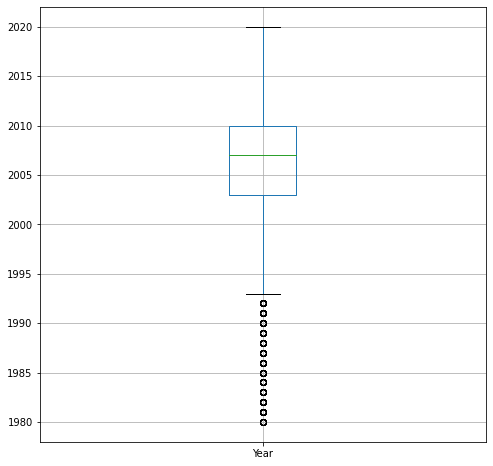

In [ ]:
# Tạo biểu đồ hộp (boxplot) để hiển thị phân phối của cột 'Year'
# Biểu đồ này giúp trực quan hóa sự phân bố của năm phát hành các trò chơi
# figsize=(8,8): thiết lập kích thước biểu đồ là 8x8 inch để dễ quan sát
# Boxplot cho thấy trung vị, tứ phân vị và các giá trị ngoại lai 
# Từ đó có thể xác định các năm có nhiều trò chơi phát hành nhất và các năm là giá trị ngoại lai
df.boxplot(column=['Year'], figsize=(8,8))

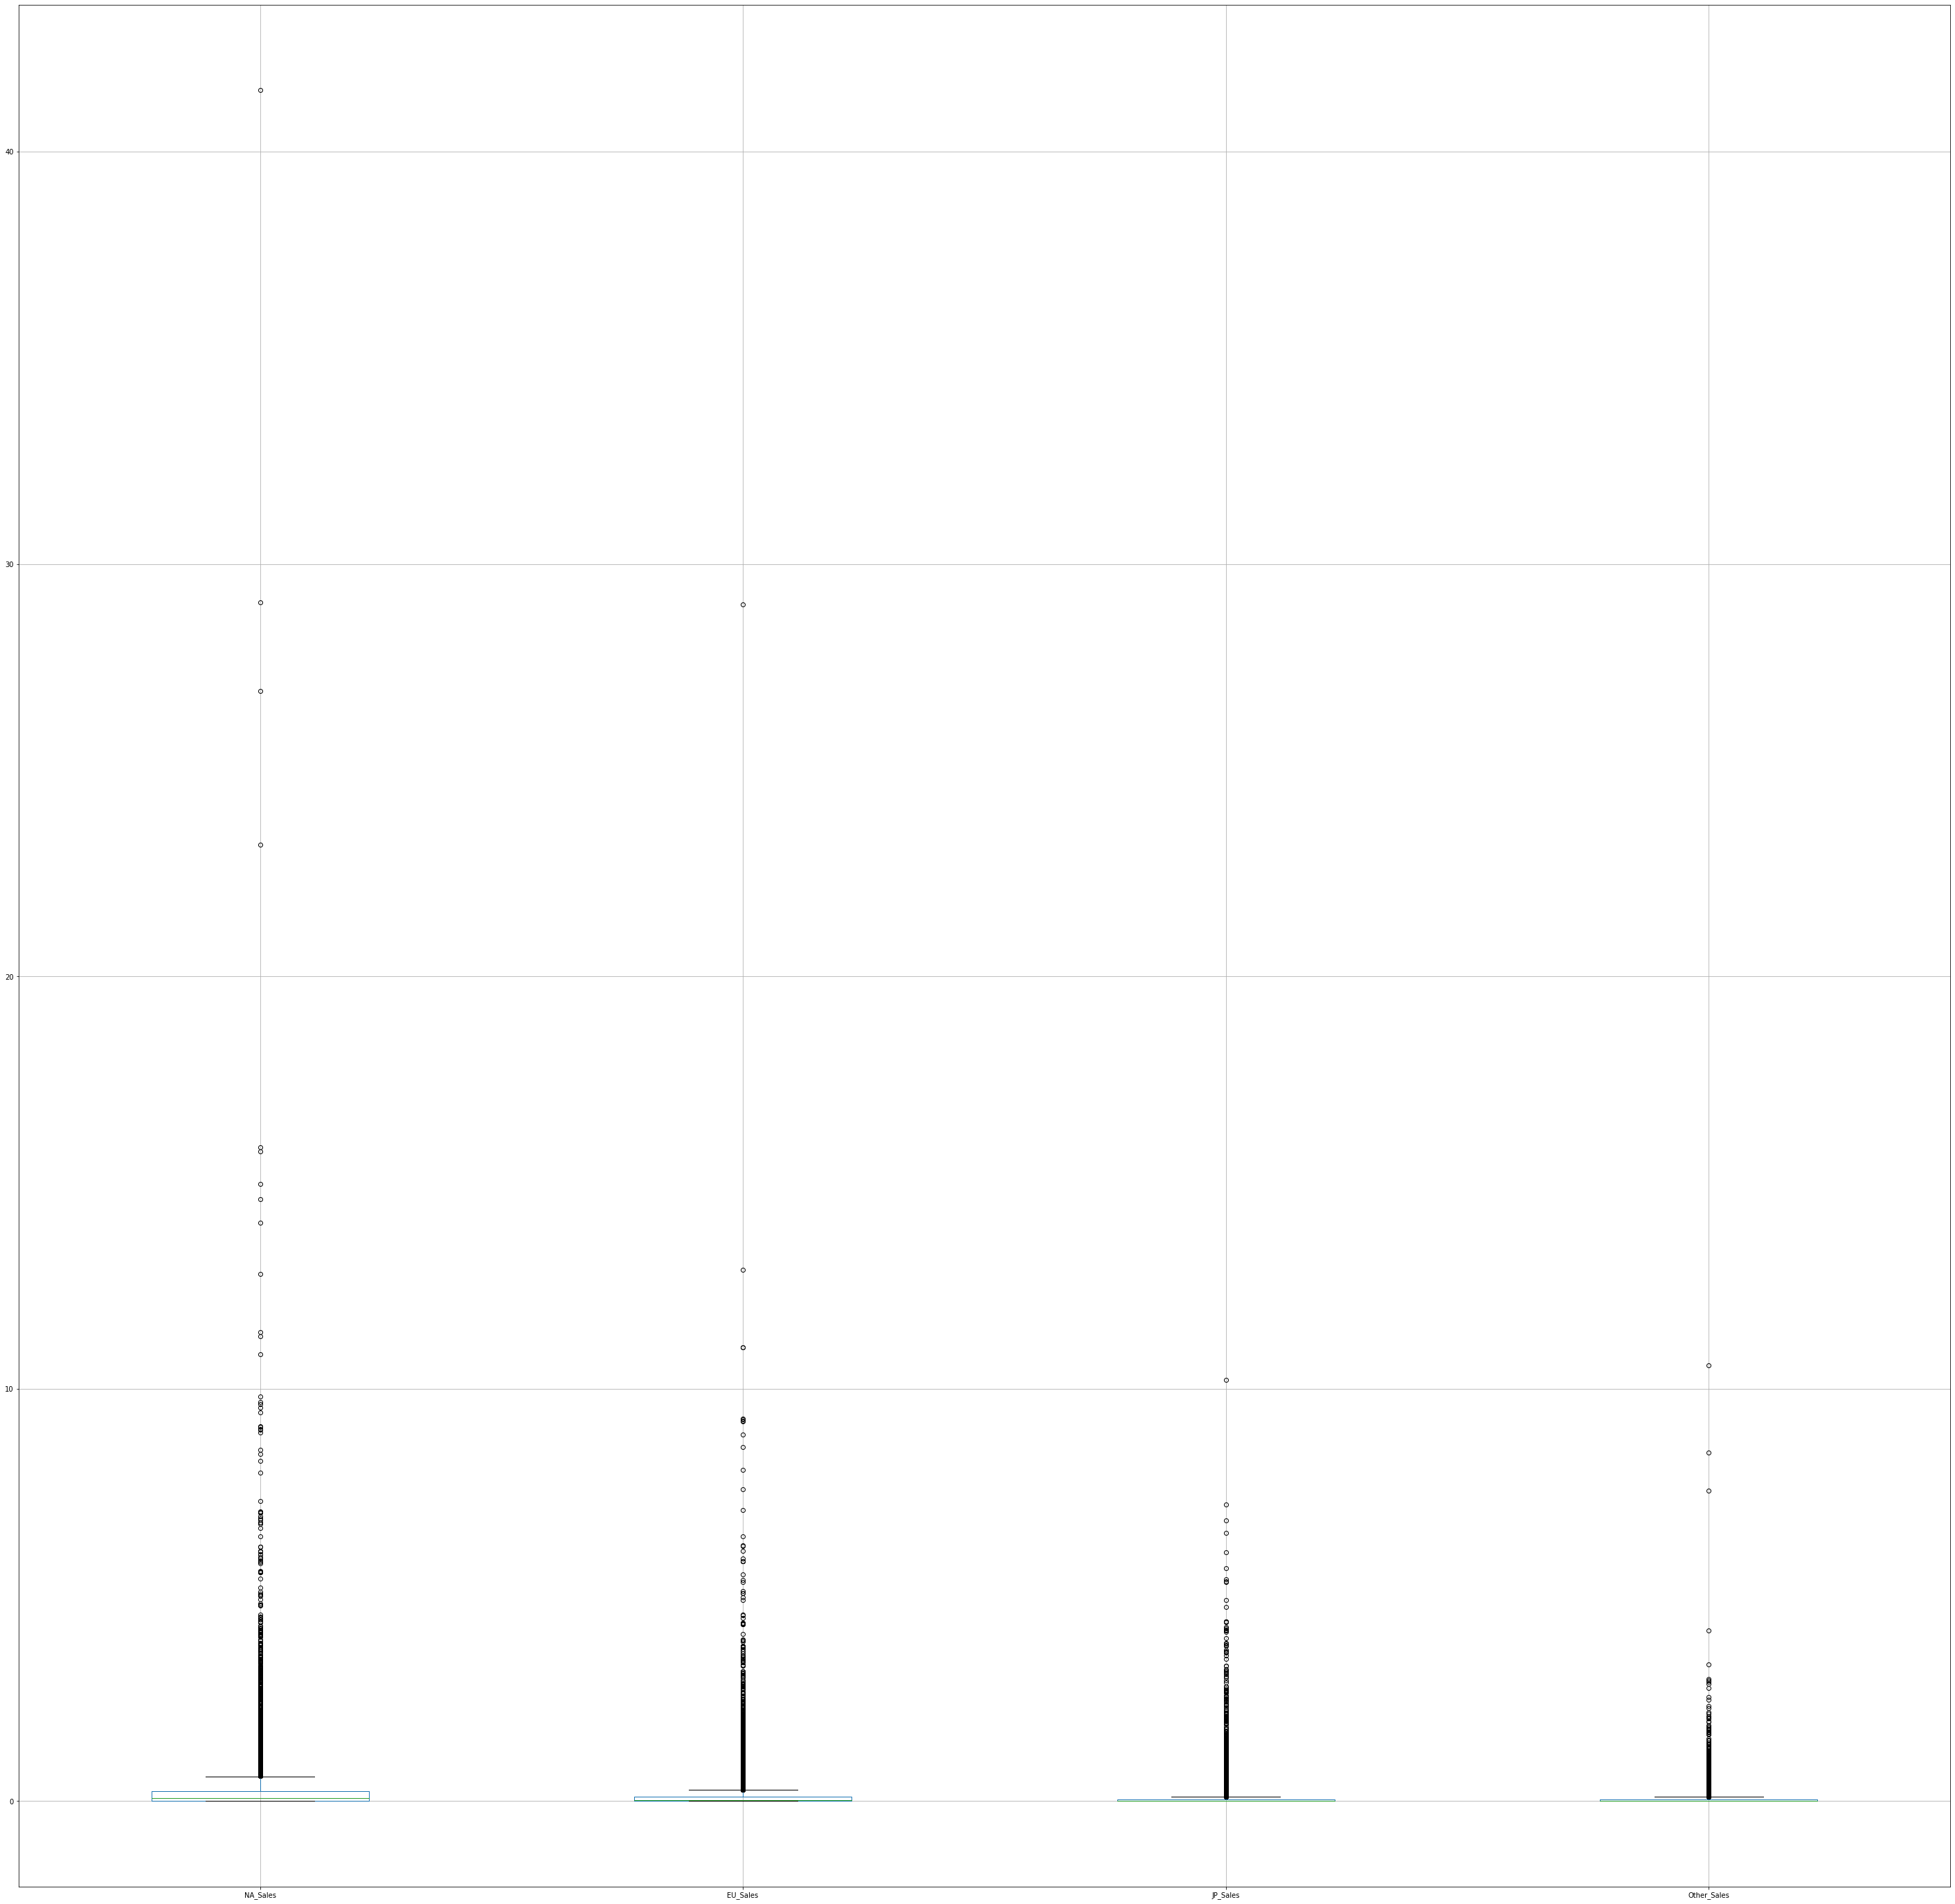

In [ ]:
# Tạo biểu đồ hộp (boxplot) cho các cột doanh số bán hàng ở các khu vực khác nhau
# Biểu đồ hộp giúp trực quan hóa phân phối dữ liệu và xác định các giá trị ngoại lai
# 'NA_Sales': Doanh số bán tại Bắc Mỹ (tính bằng triệu đơn vị)
# 'EU_Sales': Doanh số bán tại châu Âu (tính bằng triệu đơn vị)
# 'JP_Sales': Doanh số bán tại Nhật Bản (tính bằng triệu đơn vị)
# 'Other_Sales': Doanh số bán tại các khu vực khác (tính bằng triệu đơn vị)
# figsize=(50,50): đặt kích thước biểu đồ rất lớn (50x50 inch) để có thể quan sát chi tiết
# Từ biểu đồ này, chúng ta có thể:
# - So sánh mức độ phân tán doanh số bán ở các khu vực
# - Nhận diện các giá trị ngoại lai (outlier) - các điểm nằm ngoài râu của biểu đồ hộp
# - Quan sát phân phối doanh số: mức trung vị (đường giữa hộp), tứ phân vị (viền hộp)
df_no_dup.boxplot(column=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], figsize=(50,50))  

In [ ]:
# Áp dụng quy tắc thực nghiệm (Empirical Rule) để xác định các giá trị ngoại lai
# Quy tắc này nói rằng khoảng 99.7% dữ liệu nằm trong phạm vi ±3 độ lệch chuẩn từ giá trị trung bình
# Ở đây chúng ta dùng phương pháp phân vị thay vì độ lệch chuẩn

# Xác định ngưỡng dưới bằng cách lấy phân vị 0.15% (tương đương với khoảng -3 độ lệch chuẩn)
q_low = df_no_dup["NA_Sales"].quantile(0.0015)

# Xác định ngưỡng trên bằng cách lấy phân vị 99.85% (tương đương với khoảng +3 độ lệch chuẩn)
q_hi  = df_no_dup["NA_Sales"].quantile(0.9985)

# In ra thông báo giải thích khoảng giá trị được coi là bình thường và các giá trị ngoài khoảng này là ngoại lai
# Đây là cách quan trọng để xác định doanh số bán hàng bất thường tại thị trường Bắc Mỹ
print("Với doanh số tại Bắc Mỹ, khoảng giá trị không phải là ngoại lệ nằm giữa " + str(q_low) + " và " + str(q_hi) + ". Bất kỳ giá trị nào nằm ngoài các khoảng này nên được xem là giá trị ngoại lệ.")

Then with NA Sales, the range of not outlier values are between 0.0 and 8.266720000000205. Any value outside of these ranges should be considered outliers.


In [ ]:
# Xác định các giá trị ngoại lai bằng phương pháp IQR (Khoảng tứ phân vị)
import numpy as np

# Tính phân vị thứ nhất (Q1) - 25% giá trị doanh số bán ở Bắc Mỹ nằm dưới giá trị này
quartile_1 = np.percentile(df_no_dup["NA_Sales"], 25) 
# Tính phân vị thứ ba (Q3) - 75% giá trị doanh số bán ở Bắc Mỹ nằm dưới giá trị này
quartile_3 = np.percentile(df_no_dup["NA_Sales"], 75)
# Tính khoảng tứ phân vị (IQR) = Q3 - Q1, đại diện cho phạm vi của 50% dữ liệu ở giữa
interquartile_range = quartile_3 - quartile_1

# Tính ngưỡng dưới cho giá trị ngoại lai theo công thức: Q1 - 1.5*IQR
# Giá trị nhỏ hơn ngưỡng này được coi là ngoại lai dưới
q_low = quartile_1 - 1.5 * interquartile_range
# Tính ngưỡng trên cho giá trị ngoại lai theo công thức: Q3 + 1.5*IQR
# Giá trị lớn hơn ngưỡng này được coi là ngoại lai trên
q_hi = quartile_3 + 1.5 * interquartile_range

# In ra thông báo về khoảng giá trị được coi là bình thường (không phải ngoại lai)
# và giải thích rằng các giá trị nằm ngoài khoảng này nên được xem là giá trị ngoại lai
print("Với doanh số tại Bắc Mỹ, khoảng giá trị không phải là ngoại lệ nằm giữa " + str(q_low) + " và " + str(q_hi) + ". Bất kỳ giá trị nào nằm ngoài các khoảng này nên được xem là giá trị ngoại lệ.")

Then with NA Sales, the range of not outlier values are between -0.36 and 0.6. Any value outside of these ranges should be considered outliers.


### 8.2 Deal with Outlier (Xử lý giá trị ngoại lệ)

In [ ]:
# Lọc bỏ giá trị ngoại lai từ DataFrame df_no_dup sử dụng phương pháp IQR
# Chỉ giữ lại các bản ghi có doanh số bán tại Bắc Mỹ (NA_Sales) nằm trong khoảng giá trị được chấp nhận
# (df_no_dup["NA_Sales"] < q_hi): lọc ra các bản ghi có doanh số bán nhỏ hơn ngưỡng trên
# (df_no_dup["NA_Sales"] > q_low): lọc ra các bản ghi có doanh số bán lớn hơn ngưỡng dưới
# Kết hợp hai điều kiện này để chỉ giữ lại các bản ghi có doanh số bán nằm trong khoảng hợp lệ
df_filtered_stdv = df_no_dup[(df_no_dup["NA_Sales"] < q_hi) & (df_no_dup["NA_Sales"] > q_low)]

# Hiển thị kích thước của DataFrame gốc để so sánh với kích thước sau khi lọc
# Giúp đánh giá xem có bao nhiêu bản ghi bị loại bỏ do được xác định là giá trị ngoại lai
df.shape

(16598, 11)

In [ ]:
# Hiển thị kích thước (shape) của DataFrame df_filtered_stdv sau khi đã lọc bỏ các giá trị ngoại lai
# Kết quả trả về một tuple (số hàng, số cột) cho biết số lượng bản ghi còn lại sau khi loại bỏ giá trị ngoại lai
# So sánh với kích thước ban đầu của df_no_dup (hiển thị ở cell trước) cho phép biết được có bao nhiêu bản ghi
# đã bị loại bỏ vì được xác định là giá trị ngoại lai theo phương pháp IQR
df_filtered_stdv.shape

(14887, 11)

In [ ]:
# Tìm giá trị doanh số bán cao nhất tại thị trường Bắc Mỹ trong DataFrame đã loại bỏ trùng lặp
# df_no_dup["NA_Sales"] truy cập vào cột doanh số bán tại Bắc Mỹ
# .max() trả về giá trị lớn nhất trong cột này
# Kết quả này giúp chúng ta biết được doanh số bán cao nhất đạt được bởi một trò chơi tại thị trường Bắc Mỹ
# Thông tin này hữu ích để hiểu phạm vi dữ liệu và xác định các giá trị ngoại lai tiềm năng
df_no_dup["NA_Sales"].max()

41.49

In [ ]:
# Tìm giá trị lớn nhất (max) của doanh số bán tại Bắc Mỹ (NA_Sales) trong DataFrame đã lọc bỏ giá trị ngoại lai
# df_filtered_stdv chứa dữ liệu đã loại bỏ các giá trị ngoại lai theo phương pháp IQR
# So sánh giá trị này với df_no_dup["NA_Sales"].max() để thấy sự khác biệt sau khi loại bỏ giá trị ngoại lai
# Việc này giúp xác nhận rằng các giá trị ngoại lai đã được loại bỏ thành công, vì giá trị max bây giờ nhỏ hơn trước
df_filtered_stdv["NA_Sales"].max()

8.25

In [ ]:
# Thay đổi giá trị ngoại lai bằng phương pháp phân vị (Quantile method)
# Thay vì loại bỏ các giá trị ngoại lai, chúng ta sẽ thay thế chúng bằng giá trị ngưỡng

# Xác định ngưỡng trên bằng cách lấy phân vị thứ 80 của doanh số bán tại Bắc Mỹ
# Bất kỳ giá trị nào lớn hơn ngưỡng này sẽ được coi là ngoại lai và sẽ được thay thế
q_hi = df_no_dup["NA_Sales"].quantile(0.80)

# Hiển thị giá trị ngưỡng trên để có thể kiểm tra
# Đây là doanh số mà chỉ có 20% các trò chơi vượt qua được
print(q_hi)

# Tạo một bản sao của DataFrame df_no_dup để thực hiện các thay đổi mà không ảnh hưởng đến dữ liệu gốc
# DataFrame mới này sẽ được sử dụng để thay thế các giá trị ngoại lai thay vì loại bỏ chúng
test_change_outlier = df_no_dup

0.31


In [ ]:
# Thay thế các giá trị ngoại lai trong cột "NA_Sales" bằng giá trị ngưỡng q_hi
# mask(): phương thức của pandas dùng để thay thế các giá trị thỏa mãn điều kiện
# test_change_outlier["NA_Sales"] > q_hi: điều kiện xác định các giá trị ngoại lai (lớn hơn ngưỡng phân vị 80%)
# q_hi: giá trị dùng để thay thế các giá trị ngoại lai
test_change_outlier["NA_Sales"] = test_change_outlier["NA_Sales"].mask(test_change_outlier["NA_Sales"] > q_hi, q_hi)

# Hiển thị giá trị lớn nhất của doanh số bán tại Bắc Mỹ sau khi đã thay thế các giá trị ngoại lai
# Kết quả này sẽ bằng chính xác với giá trị q_hi đã thiết lập,
# chứng tỏ các giá trị lớn hơn q_hi đã được thay thế thành công
test_change_outlier["NA_Sales"].max()


0.31

In [ ]:
# Hiển thị kích thước (shape) của DataFrame df_no_dup sau khi đã loại bỏ các bản ghi trùng lặp
# Kết quả trả về là một tuple (số hàng, số cột) cho biết số lượng bản ghi và đặc trưng còn lại
# Thông tin này giúp chúng ta đánh giá mức độ dữ liệu bị trùng lặp trong bộ dữ liệu gốc
# So sánh với kích thước ban đầu của df sẽ cho thấy có bao nhiêu bản ghi đã bị loại bỏ
df_no_dup.shape

(16598, 11)

In [ ]:
# Hiển thị kích thước (shape) của DataFrame test_change_outlier sau khi đã thay thế các giá trị ngoại lai
# Kết quả trả về một tuple (số hàng, số cột) cho biết số lượng bản ghi và đặc trưng trong DataFrame
# DataFrame này vẫn giữ nguyên số lượng bản ghi như df_no_dup vì chúng ta đã thay thế các giá trị ngoại lai
# thay vì loại bỏ chúng (khác với phương pháp lọc đã sử dụng trong df_filtered_stdv)
test_change_outlier.shape

(16598, 11)

In [ ]:
# Hiển thị giá trị doanh số bán cao nhất tại thị trường Bắc Mỹ trong DataFrame df_no_dup
# df_no_dup là DataFrame đã loại bỏ các bản ghi trùng lặp
# ["NA_Sales"] truy cập vào cột chứa dữ liệu về doanh số bán tại Bắc Mỹ (tính bằng triệu đơn vị)
# .max() trả về giá trị lớn nhất trong cột này
# Kết quả giúp chúng ta biết được mức doanh số bán hàng cao nhất mà một trò chơi đạt được tại thị trường Bắc Mỹ
# Đây là thông tin hữu ích để hiểu phạm vi dữ liệu và cũng có thể được sử dụng để so sánh với kết quả sau khi xử lý giá trị ngoại lai
df_no_dup["NA_Sales"].max()

0.31

## 11. Univariate Analysis (Phân tích đơn biến)

Trong phần này, chúng ta sẽ tập trung vào Thể loại (Genre) và Doanh số toàn cầu (Global Sales) vì chúng ta chưa đề cập đến hai đặc điểm này.

Thể loại (Genre): Biến phân loại
Doanh số toàn cầu (Global Sales): Biến số (biến định lượng)

In [ ]:
# Method 1: Thống kê tổng quan (Summary Statistics)
# Phương thức describe() tính toán và hiển thị các thống kê cơ bản của cột Global_Sales:
# - count: số lượng giá trị không null
# - mean: giá trị trung bình của doanh số toàn cầu
# - std: độ lệch chuẩn thể hiện mức độ phân tán của dữ liệu
# - min: giá trị doanh số thấp nhất
# - 25%: phân vị thứ nhất (Q1), 25% doanh số thấp hơn giá trị này
# - 50%: phân vị thứ hai (trung vị), 50% doanh số thấp hơn giá trị này
# - 75%: phân vị thứ ba (Q3), 75% doanh số thấp hơn giá trị này
# - max: giá trị doanh số cao nhất
# Kết quả giúp hiểu được phân phối của doanh số toàn cầu trong bộ dữ liệu

df["Global_Sales"].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

In [ ]:
# Method 2: Frequency Distribution - Categorical (Phân bố tần số - Biến phân loại)

# Nhóm dữ liệu theo cột "Genre" và đếm số lượng game trong mỗi thể loại
# groupby("Genre"): nhóm các bản ghi có cùng thể loại với nhau
# ["Genre"].count(): đếm số lượng bản ghi trong mỗi nhóm thể loại
frequency_distribution_genre = df.groupby("Genre")["Genre"].count()

# Tạo DataFrame mới từ kết quả đếm tần số xuất hiện của từng thể loại
# DataFrame này sẽ có cấu trúc với index là tên thể loại và giá trị là số lượng game thuộc thể loại đó
data_genre = pd.DataFrame(frequency_distribution_genre)

# Hiển thị DataFrame chứa phân phối tần số của các thể loại game
# Điều này giúp chúng ta xác định các thể loại game phổ biến nhất trong bộ dữ liệu
data_genre

,Genre
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


In [ ]:
# Method 2: Phân phối tần số - Biến số (Frequency Distribution - Numerical)

def categorise(row):  
    # Nếu doanh số toàn cầu nhỏ hơn hoặc bằng 1 triệu đơn vị
    if row['Global_Sales'] <= 1:
        return 'Nhỏ hơn hoặc bằng 1 triệu'
    # Nếu doanh số toàn cầu lớn hơn 1 triệu và nhỏ hơn hoặc bằng 20 triệu đơn vị
    elif row['Global_Sales'] > 1 and row['Global_Sales'] <= 20:
        return 'Lớn hơn 1 triệu và nhỏ hơn hoặc bằng 20 triệu'
    # Nếu doanh số toàn cầu lớn hơn 20 triệu đơn vị
    elif row['Global_Sales'] > 20:
        return 'Lớn hơn 20 triệu'
    # Trường hợp không có dữ liệu doanh số toàn cầu
    return 'Không có dữ liệu'

# Áp dụng hàm categorise cho mỗi hàng trong DataFrame để phân loại doanh số toàn cầu
# axis=1: thực hiện thao tác theo hàng (ngang) thay vì theo cột
# Kết quả được lưu vào một cột mới có tên 'Global_Sales_Category'
df['Global_Sales_Category'] = df.apply(lambda row: categorise(row), axis=1)

In [ ]:
# Nhóm dữ liệu theo cột "Global_Sales_Category" và đếm số lượng game trong mỗi nhóm doanh số
# groupby("Global_Sales_Category"): nhóm các bản ghi có cùng nhóm doanh số toàn cầu
# ["Global_Sales_Category"].count(): đếm số lượng bản ghi trong mỗi nhóm doanh số
Global_Sales_Category = df.groupby("Global_Sales_Category")["Global_Sales_Category"].count()

# Tạo DataFrame mới từ kết quả đếm tần số xuất hiện của từng nhóm doanh số
# DataFrame này sẽ có cấu trúc với index là tên nhóm doanh số và giá trị là số lượng game thuộc nhóm đó
data_global_sales = pd.DataFrame(Global_Sales_Category)

# Hiển thị DataFrame chứa phân phối tần số của các nhóm doanh số toàn cầu
# Điều này giúp chúng ta xác định mức phổ biến của các nhóm doanh số trong bộ dữ liệu
data_global_sales

,Global_Sales_Category
Global_Sales_Category,
Less than 1 mil,14544
More than 1 mil and Less Than 20 mil,2034
More than 20 mil,20


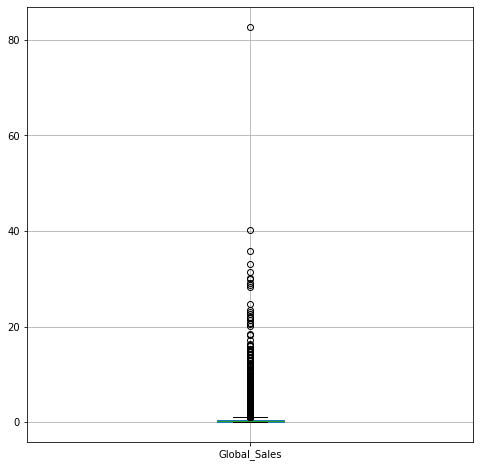

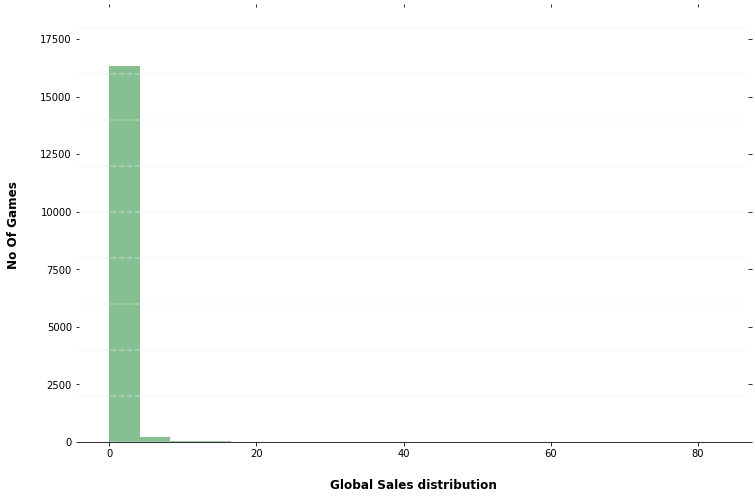

In [ ]:
# Phương pháp 3: Biểu đồ - Phân phối doanh số toàn cầu

# Tạo biểu đồ hộp (boxplot) để hiển thị phân phối thống kê của doanh số toàn cầu
# figsize=(8,8): thiết lập kích thước biểu đồ là 8x8 inch để dễ quan sát
# Biểu đồ hộp sẽ hiển thị: trung vị (đường ngang giữa hộp), tứ phân vị (viền hộp),
# các giá trị nằm trong khoảng 1.5*IQR (các đường râu) và các điểm ngoại lai
df.boxplot(column=['Global_Sales'], figsize=(8,8))  

# Tạo biểu đồ histogram cho cột 'Global_Sales' với 20 khoảng (bins)
# grid=False: không hiển thị lưới, figsize=(12,8): kích thước biểu đồ 12x8 inch
# color='#86bf91': sử dụng màu xanh lá cây cho các cột trong biểu đồ
# Biểu đồ histogram giúp trực quan hóa phân phối tần số của doanh số toàn cầu
ax = df.hist(column='Global_Sales', bins=20, grid=False, figsize=(12,8), color='#86bf91')

# Lấy đối tượng axes đầu tiên từ mảng trả về bởi hàm hist()
# Vì hist() trả về một mảng các đối tượng axes, chúng ta lấy phần tử đầu tiên để tùy chỉnh
ax = ax[0]

# Vòng lặp qua từng đối tượng trục (axes) trong biểu đồ để tùy chỉnh giao diện
for x in ax:

    # Loại bỏ viền (despine) - ẩn viền bên phải của biểu đồ để làm cho nó trông gọn gàng hơn
    x.spines['right'].set_visible(False)
    # Ẩn viền phía trên của biểu đồ để tập trung vào dữ liệu
    x.spines['top'].set_visible(False)
    # Ẩn viền bên trái của biểu đồ để tạo giao diện tối giản
    x.spines['left'].set_visible(False)

    # Tắt tất cả các dấu tích (ticks) trên các trục để làm cho biểu đồ trông sạch sẽ hơn
    # bottom="off": tắt dấu tích dưới, top="off": tắt dấu tích trên
    # labelbottom="on": giữ nhãn dưới để hiển thị các giá trị doanh số
    # left="off": tắt dấu tích trái, right="off": tắt dấu tích phải
    # labelleft="on": giữ nhãn trái để hiển thị số lượng trò chơi
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Vẽ các đường ngang tương ứng với các giá trị trục y để dễ đọc số lượng
    # Lấy các giá trị tích trên trục y
    vals = x.get_yticks()
    # Với mỗi giá trị tích, vẽ một đường ngang đứt nét mờ để người đọc dễ dàng theo dõi
    # alpha=0.4: đặt độ mờ cho đường nét, giúp không lấn át dữ liệu chính
    # color='#eeeeee': màu xám nhạt cho các đường lưới
    # zorder=1: đặt thứ tự hiển thị, đảm bảo các đường lưới nằm dưới các thanh histogram
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Xóa tiêu đề mặc định của biểu đồ để tạo giao diện tối giản hơn
    # Tiêu đề sẽ được thay thế bằng nhãn trục x và y có ý nghĩa hơn
    x.set_title("")

    # Đặt nhãn cho trục x, mô tả phân phối doanh số toàn cầu
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_xlabel("Phân phối doanh số toàn cầu", labelpad=20, weight='bold', size=12)

    # Đặt nhãn cho trục y, mô tả số lượng trò chơi trong mỗi khoảng doanh số
    # labelpad=20: khoảng cách giữa trục và nhãn là 20 đơn vị
    # weight='bold': in đậm, size=12: kích thước chữ là 12
    x.set_ylabel("Số lượng trò chơi", labelpad=20, weight='bold', size=12)

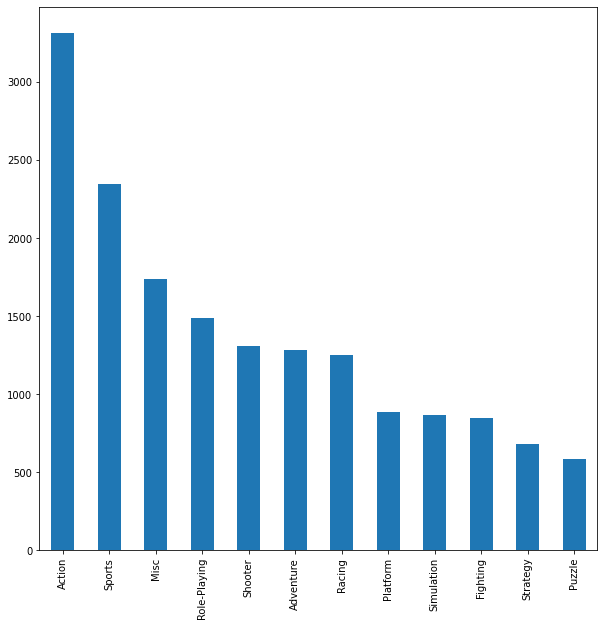

In [ ]:
# Tạo biểu đồ cột hiển thị số lượng trò chơi theo từng thể loại (Genre)
# df['Genre'].value_counts(): đếm số lượng trò chơi trong mỗi thể loại và sắp xếp theo thứ tự giảm dần
# plot(kind='bar'): vẽ biểu đồ cột dựa trên kết quả đếm
# figsize = (10,10): đặt kích thước biểu đồ là 10x10 inch để dễ quan sát
# Biểu đồ này giúp trực quan hóa phân bố các thể loại game phổ biến nhất trong bộ dữ liệu
df['Genre'].value_counts().plot(kind='bar', figsize = (10,10))

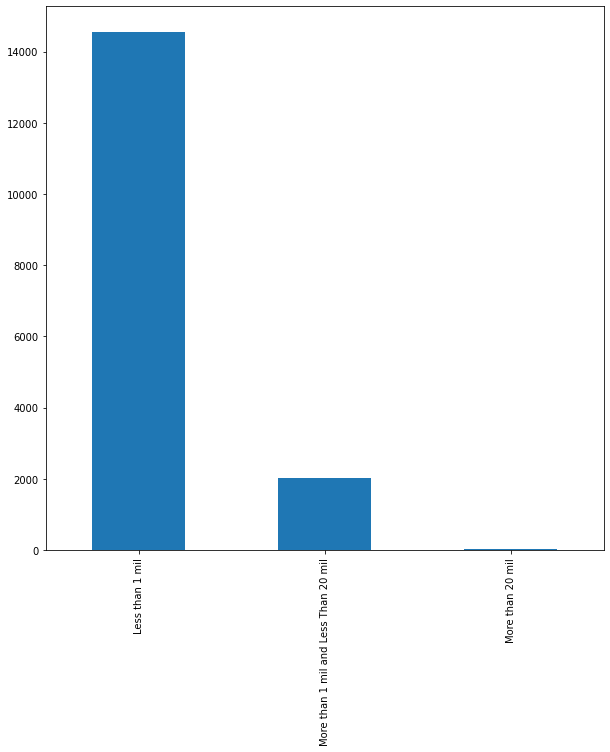

In [ ]:
# Tạo biểu đồ cột hiển thị số lượng trò chơi theo các nhóm doanh số toàn cầu
# df['Global_Sales_Category'].value_counts(): đếm số lượng trò chơi trong mỗi nhóm doanh số và sắp xếp theo thứ tự giảm dần
# plot(kind='bar'): vẽ biểu đồ dạng cột từ dữ liệu đếm được
# figsize = (10,10): đặt kích thước biểu đồ là 10x10 inch để dễ nhìn
# Biểu đồ này giúp trực quan hóa sự phân bố của các trò chơi theo các nhóm doanh số khác nhau,
# cho phép đánh giá nhanh các phân khúc doanh số phổ biến nhất trong bộ dữ liệu
df['Global_Sales_Category'].value_counts().plot(kind='bar', figsize = (10,10 ))

## 12. Bivariate Analysis (Phân tích hai biến)

For the example, we will see if there is any correlation between NA_Sales and EU_Sales

**Các trường dữ liệu: (Được cung cấp)**

Name – Tên của trò chơi

Platform – Nền tảng phát hành trò chơi (ví dụ: PC, PS4, v.v.)

Year – Năm phát hành trò chơi

Genre – Thể loại của trò chơi

Publisher – Nhà phát hành trò chơi

NA_Sales – Doanh số tại Bắc Mỹ (tính bằng triệu đơn vị)

EU_Sales – Doanh số tại châu Âu (tính bằng triệu đơn vị)

JP_Sales – Doanh số tại Nhật Bản (tính bằng triệu đơn vị)

Other_Sales – Doanh số tại các khu vực khác trên thế giới (tính bằng triệu đơn vị)

Global_Sales – Tổng doanh số toàn cầu.

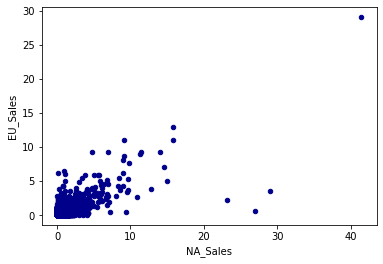

In [ ]:
# Chúng ta nhận thấy khó có thể nhìn ra xu hướng nào vì hầu hết các giá trị trong cả hai đặc trưng đều nằm trong khoảng 0-1.

# Tạo biểu đồ phân tán (scatter plot) để thể hiện mối quan hệ giữa doanh số bán ở Bắc Mỹ và châu Âu
# df.plot.scatter(): phương thức tạo biểu đồ phân tán từ DataFrame
# x='NA_Sales': đặt doanh số bán ở Bắc Mỹ làm trục hoành (x)
# y='EU_Sales': đặt doanh số bán ở châu Âu làm trục tung (y)
# c='DarkBlue': đặt màu xanh đậm cho các điểm dữ liệu trong biểu đồ
scatter_plot = df.plot.scatter(x='NA_Sales',
                                y='EU_Sales',
                                c='DarkBlue'
                              )

In [ ]:
# Tính hệ số tương quan Pearson giữa doanh số bán ở Bắc Mỹ (NA_Sales) và doanh số bán ở châu Âu (EU_Sales)
# Hệ số này cho biết mức độ tương quan tuyến tính giữa hai biến số
# Giá trị trả về nằm trong khoảng từ -1 đến 1:
#   - Gần 1: tương quan dương mạnh (khi NA_Sales tăng thì EU_Sales cũng tăng)
#   - Gần 0: ít hoặc không có tương quan
#   - Gần -1: tương quan âm mạnh (khi NA_Sales tăng thì EU_Sales giảm)
# Kết quả này giúp đánh giá liệu doanh số bán ở hai khu vực có xu hướng biến đổi cùng nhau hay không
df['NA_Sales'].corr(df['EU_Sales'])

0.7677267483702631

In [ ]:
# Tạo một DataFrame con chỉ chứa các cột doanh số bán hàng để phân tích tương quan
# Các cột được chọn bao gồm:
# - NA_Sales: doanh số bán tại Bắc Mỹ (tính bằng triệu đơn vị)
# - EU_Sales: doanh số bán tại châu Âu (tính bằng triệu đơn vị)
# - JP_Sales: doanh số bán tại Nhật Bản (tính bằng triệu đơn vị)
# - Other_Sales: doanh số bán tại các khu vực khác (tính bằng triệu đơn vị)
# - Global_Sales: tổng doanh số bán toàn cầu (tính bằng triệu đơn vị)
correlation_data = df[['NA_Sales','EU_Sales',	'JP_Sales',	'Other_Sales', "Global_Sales"]]

# Tính ma trận tương quan giữa tất cả các cặp biến doanh số
# Phương thức corr() tính hệ số tương quan Pearson giữa các cột trong DataFrame
# Kết quả trả về là một ma trận vuông với giá trị từ -1 đến 1:
# - Gần 1: tương quan dương mạnh (hai biến cùng tăng/giảm)
# - Gần 0: ít hoặc không có tương quan
# - Gần -1: tương quan âm mạnh (một biến tăng, biến kia giảm)
# Ma trận này giúp đánh giá mối quan hệ giữa doanh số bán hàng ở các khu vực khác nhau
correlation_data.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


In [ ]:
# Tính toán ma trận tương quan giữa năm phát hành (Year) và doanh số bán hàng ở các khu vực khác nhau
# Phương thức corr() tính hệ số tương quan Pearson giữa tất cả các cặp biến được chọn:
# - Year: năm phát hành trò chơi - giúp phân tích xu hướng doanh số theo thời gian
# - NA_Sales: doanh số bán tại Bắc Mỹ (tính bằng triệu đơn vị)
# - EU_Sales: doanh số bán tại châu Âu (tính bằng triệu đơn vị)
# - JP_Sales: doanh số bán tại Nhật Bản (tính bằng triệu đơn vị)
# - Other_Sales: doanh số bán tại các khu vực khác (tính bằng triệu đơn vị)
# - Global_Sales: tổng doanh số bán toàn cầu (tính bằng triệu đơn vị)
# Kết quả hiển thị mức độ tương quan giữa năm phát hành và doanh số, giúp đánh giá liệu trò chơi mới hơn
# có xu hướng bán tốt hơn hay không, và mối quan hệ giữa doanh số ở các khu vực khác nhau
df[["Year", 'NA_Sales','EU_Sales',	'JP_Sales',	'Other_Sales', "Global_Sales"]].corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


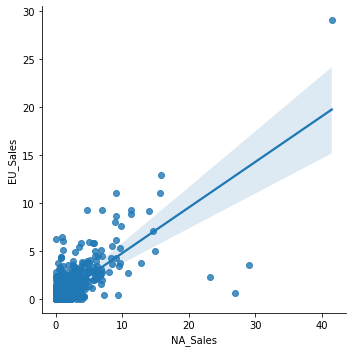

In [ ]:
# Import thư viện seaborn để vẽ biểu đồ thống kê nâng cao
# Seaborn cung cấp các giao diện cấp cao cho vẽ biểu đồ đẹp mắt dựa trên matplotlib
import seaborn as sns

# Tạo biểu đồ phân tán kèm đường hồi quy tuyến tính để thể hiện mối quan hệ giữa doanh số bán ở Bắc Mỹ và châu Âu
# sns.lmplot: hàm vẽ biểu đồ phân tán kèm theo mô hình hồi quy tuyến tính
# x='NA_Sales': đặt doanh số bán ở Bắc Mỹ làm trục hoành (x)
# y='EU_Sales': đặt doanh số bán ở châu Âu làm trục tung (y)
# data=df[['NA_Sales','EU_Sales']]: sử dụng dữ liệu từ hai cột này của DataFrame
# fit_reg=True: vẽ đường hồi quy tuyến tính để thể hiện mối tương quan
# Biểu đồ này cho phép trực quan hóa mối quan hệ tuyến tính giữa doanh số bán ở hai khu vực
sns.lmplot(x='NA_Sales',y='EU_Sales',data=df[['NA_Sales','EU_Sales']],fit_reg=True) 

## 13. Multivariate Analysis (Phân tích đa biến)

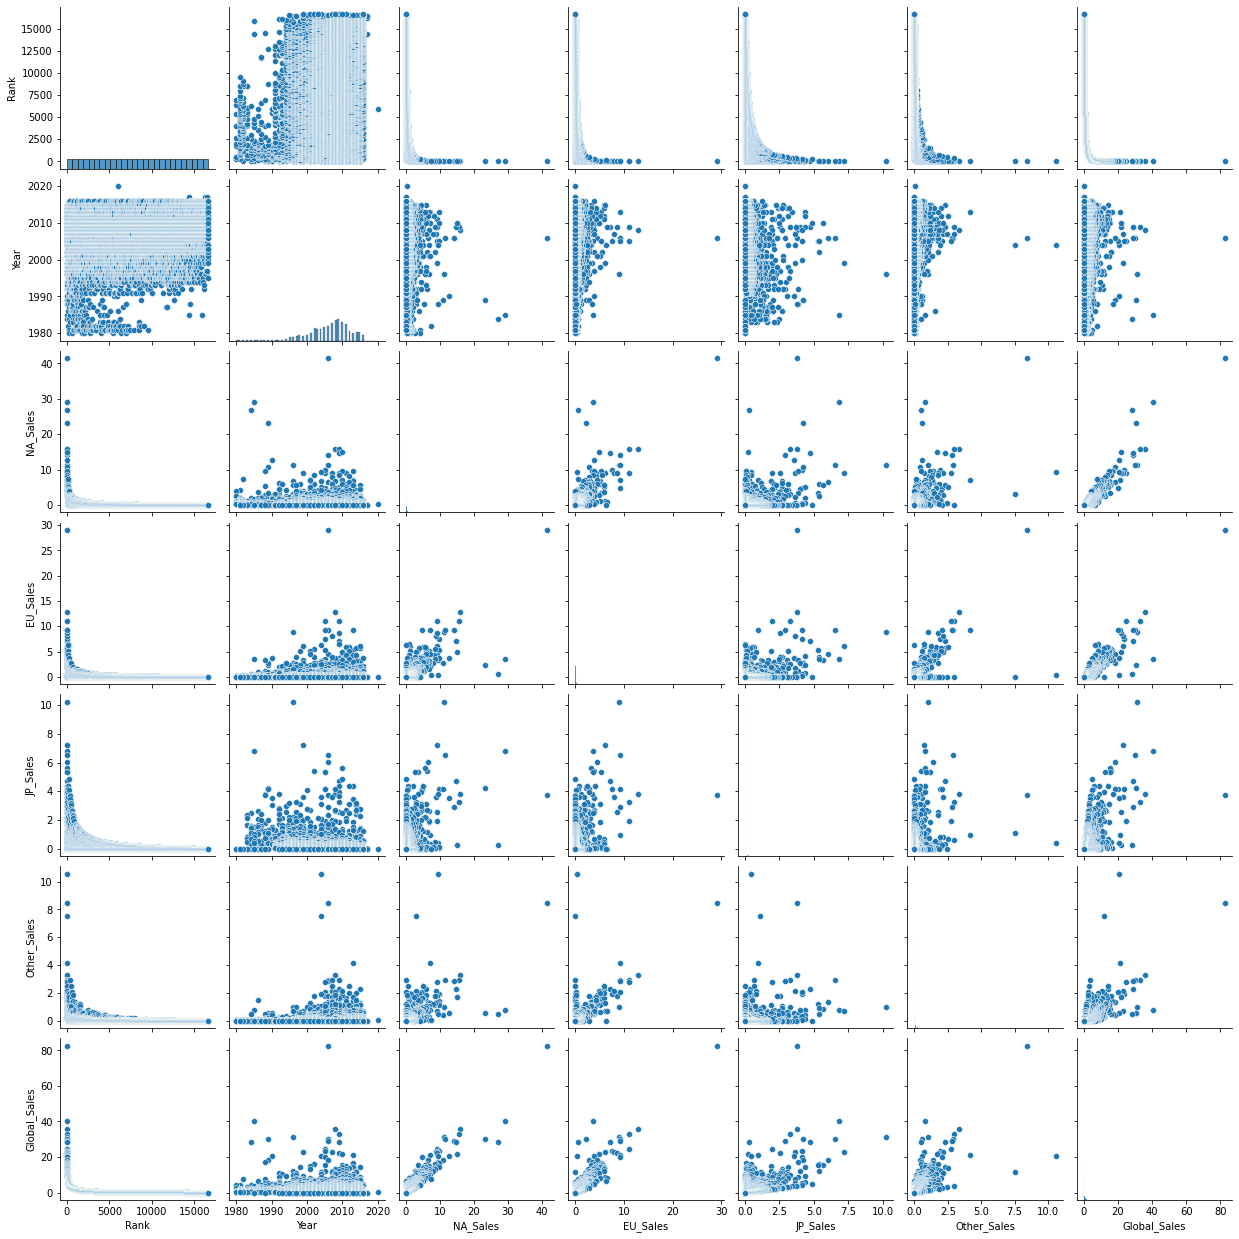

In [ ]:
# Import thư viện seaborn để tạo các biểu đồ trực quan và thống kê nâng cao
# Seaborn xây dựng trên matplotlib và cung cấp giao diện cấp cao để tạo biểu đồ đẹp mắt
import seaborn

# Import thư viện matplotlib.pyplot để tùy chỉnh và hiển thị các biểu đồ
# Matplotlib là thư viện vẽ đồ thị cơ bản trong Python, cung cấp nhiều công cụ để tùy biến biểu đồ
import matplotlib.pyplot as plt

# Tạo biểu đồ phân tích đa biến với seaborn.pairplot
# Hàm pairplot() tự động tạo ma trận các biểu đồ phân tán cho tất cả các cặp biến số trong DataFrame
# Mỗi biểu đồ phân tán thể hiện mối quan hệ giữa hai biến
# Trên đường chéo chính sẽ hiển thị biểu đồ phân phối (histogram) của từng biến
# Đây là công cụ mạnh mẽ để khám phá mối quan hệ đa biến và xác định tương quan giữa nhiều đặc trưng cùng lúc
seaborn.pairplot(df)

## 14. Feature Engineering (Kỹ thuật tạo đặc trưng)

In [ ]:
# Định nghĩa hàm average_sales để tính doanh số bán trung bình theo khu vực
# Hàm này nhận một hàng (row) từ DataFrame làm tham số đầu vào
# và trả về doanh số toàn cầu chia đều cho 4 khu vực
def average_sales(row):  
    # Tính doanh số trung bình bằng cách chia doanh số toàn cầu cho 4 (số khu vực: NA, EU, JP, Other)
    return row['Global_Sales']/4

# Tạo một cột mới 'Average_Sales_Region' trong DataFrame df
# Sử dụng phương thức apply() để áp dụng hàm average_sales cho từng hàng trong DataFrame
# axis=1: áp dụng hàm theo chiều ngang (theo hàng) thay vì theo cột
# Kết quả là một cột mới chứa giá trị doanh số bán trung bình trên mỗi khu vực
df['Average_Sales_Region'] = df.apply(lambda row: average_sales(row), axis=1)

In [ ]:
# Hiển thị 5 hàng đầu tiên của DataFrame df
# Phương thức head(5) trả về 5 bản ghi đầu tiên trong bộ dữ liệu
# Kết quả hiển thị cho phép kiểm tra nhanh cấu trúc dữ liệu, các cột có sẵn
# và cột 'Average_Sales_Region' mới được tạo ra từ tính năng kỹ thuật ở cell trước
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Average_Sales_Region
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,20.6850
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10.0600
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.9550
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,8.2500
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7.8425
